<a href="https://colab.research.google.com/github/rharkovsky/puc_mvp1/blob/main/MVP2_Harkovsky_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. MVP Machine Learning

## ROBERTO HARKOVSKY DA CUNHA

### Base Movie Dataset: Budgets, Genres, Insights

## A1. Definição do Problema

O negócio de entretenimento cinematográfico busca não somente gerar conteúdos que entretenham seu público, mas também, como qualquer outra empresa, visa obtenção de lucros. Muitos fatores, como boas histórias, bons diretores e atores experientes contribuem para criação de bons filmes. além disto, temos as avaliações dos críticos e a aceitação popular dos conteúdos que podem influenciar num bom desempenho de bilheteria. Desta forma, com base em informações massivas sobre filmes, seria interessante entender quais são os fatores importantes que tornam um filme mais bem-sucedido do que outros, ou seja, obtém maior pontuação no IMDB.

Sobre o dataset:
O dataset utilizado neste projeto será o IMDB 5000 Movie Dataset, proveniente originalmente do Kaggle. Ele contém 5.043 filmes, abrangendo 100 anos (1916 a 2016)  em 66 países, classificados segundo 28 variáveis, e informações massivas de diretores (2399 nomes únicos) e milhares de atores/atrizes.
Ele possui uma coleção abrangente de informações sobre 5.043 filmes. Ele fornece uma ampla gama de detalhes sobre cada filme, incluindo orçamento, gêneros, produtoras, data de lançamento, receita, tempo de execução, idioma, popularidade e muito mais.

Informações sobre os atributos:
1. movie_title - Título do filme
2. duration - Duração em minutos
3. director_name - Nome do Diretor do Filme
4. director_facebook_likes - Número de curtidas do Diretor em sua página no Facebook
5. actor_1_name - Ator principal estrelando o filme
6. actor_1_facebook_likes - Número de curtidas do Ator 1 em sua página no Facebook
7. actor_2_name - Outro ator estrelando o filme
8. actor_2_facebook_likes - Número de curtidas do Ator 2 em sua página no Facebook
9. actor_3_name - Outro ator estrelando o filme
10. actor_3_facebook_likes - Número de curtidas do Ator 3 em sua página no Facebook
11. num_user_for_reviews - Número de usuários que deram uma avaliação
12. num_critic_for_reviews - Número de resenhas críticas no imdb
13. num_voted_users - Número de pessoas que votaram no filme
14. cast_total_facebook_likes - Número total de curtidas no Facebook de todo o elenco do filme
15. movie_facebook_likes - Número de curtidas no Facebook na página do filme
16. plot_keywords - Palavras - chave que descrevem o enredo do filme
17. facenumber_in_poster - Número do ator que apareceu no pôster do filme
18. color - Colorização de filmes (P&B ou 'Cores')
19. genres - Gênero do filme ('Animação', 'Comédia', 'Romance', 'Terror', 'Sci - Fi', 'Ação', 'Família')
20. title_year - O ano em que o filme foi lançado (entre 1916 e 2016)
21. language - linguagem do filme
22. country - País onde o filme foi produzido
23. content_rating - Classificação do conteúdo do filme
24. aspect_ratio - Proporção de tela em que o filme foi feito
25. movie_imdb_link - Link para IMDB do filme
26. gross - Receita bruta do filme em dólares
27. budget - Orçamento do filme em dólares
28. imdb_score - Pontuação IMDB do filme no IMDB


Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

Com base nas informações massivas do filme, seria interessante entender quais são os fatores importantes que tornam um filme mais bem-sucedido do que outros. Então, gostaria de analisar que tipo de filme faz mais sucesso, ou seja, consegue maior pontuação no IMDB.

Desta forma, será considerado “imdb_score” como variável alvo e analisado as demais variáveis como possíveis preditoras.

A hipótese a ser avaliada nesta análise é se é possível criar um modelo para a predição do imdb de um filme a partir das diversas informações do mesmo (atributos preditores).

Este é um problema de aprendizado supervisionado por regressão.



## A2. Carga de dados
Nesta primeira etapa será feita a importação dos pacotes necessários a análise, definição de funções úteis na análise e a carga do dataset.




### Importando Biliotecas

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Particionamento e validação cruzada
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada

# modelagem
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# métrica de avaliação MSE
from sklearn.metrics import mean_squared_error

# algoritmos de regressão
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

# selecao de atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

### *Preparando o Dataset*

Carregando o dataset

In [2]:
# conexão com GDrive
# from google.colab import drive
# drive.mount('/content/gdrive')
# arquivo = "movie_metadata.csv"
# url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo

# Conexão com GitHub
arquivo = "movie_metadata.csv"
url_dados = "https://raw.githubusercontent.com/rharkovsky/puc_mvp1/main/" + arquivo

# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

<class 'pandas.core.frame.DataFrame'>


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## A3. Análise Exploratória de Dados
O processo de análise exploratória irá envolver 3 fases:

- Análise descritivas do dataset, onde serão levantadas suas dimensões, tipos de variáveis e estatísticas de frequência daqueles numerais.

- Em seguida começaremos a análise pelas visualizações unimodais, onde avaliaremos o comportamento das variáveis numéricas, sua distribuição estatística

- Após isto partiremos para visualizações multimodais, onde buscaremos as relações entre as possíveis variáveis preditoras e a variável alvo "imdb_score".



### 3.1. Estatísticas Descritivas
Nesta primeira etapa será realizada uma análise descritiva do dataset, onde serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

In [3]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(5043, 28)


O dataset possui 28 colunas com 5043 linhas

In [4]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

*** Linhas duplicadas ***
45


O Dataset está bastante fragmentado.

As diversas linhas com missing nos atributos serão tratadas na etapa de pre-processamentode dados

In [5]:
# Mostra as informações sobre as variáveis do dataset
display(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

None

*   16 variáveis quantitativas numéricas

*   12 variáveis qualitativas


In [6]:
# exibindo um sumário estatístico
display(ds.describe())

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000



---


**Percepções**

**Análise descritiva**

•	Temos um dataset com  28 colunas com 5043  instâncias

•	Do total de 28 variáveis, onde 12 são do tipo object qualitativas e 16 quantitativas numéricas

**Análise estatística**

•	Os valores mínimos em 0 (zero) pode indicar erros nas diversas variáveis numéricas, que devem ser analisados na fase de pré-processamento de dados.


---



### 3.2. Visualizações Unimodais

Para avaliar a distribuição de frequências das variáveis numéricas iremos utilizar gráficos de histograma e de densidade para cada um destes atributos numéricos do dataset.



Gerando gráficos de histograma e densidade

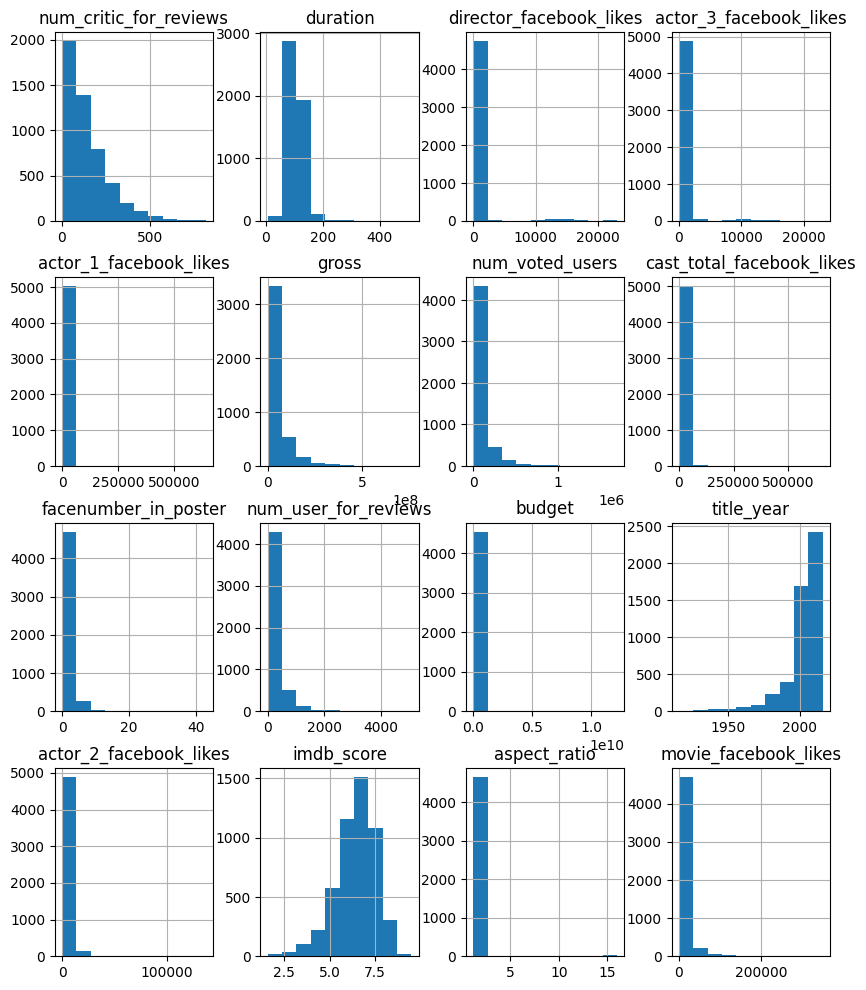

In [7]:
# Histograma
ds.hist(figsize = (10,12))
plt.show()

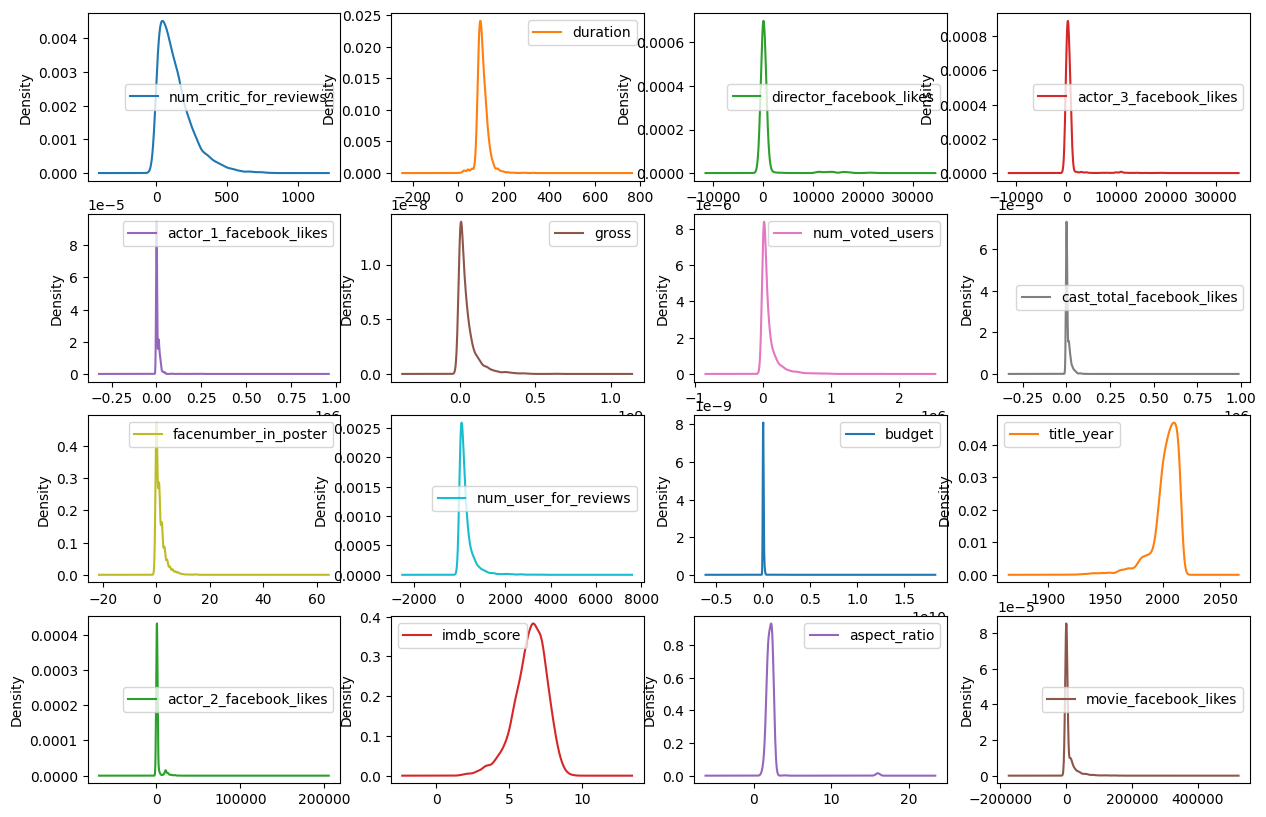

In [8]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

Os gráficos de Histograma e densidade mostram que as variáveis são unimodais, e que as variáveis "IMDB_score" e "duration" com um comportamento aproximado de uma curva normal. As demais apresentam skew, com um comportamento parecido com logaritmico.

---

**Resumo das percepções da análise da visualização Unimodal:**

- Os gráficos de Histograma e densidade mostram que as variáveis são unimodais, sendo que as variáveis "imdb_score" e "duration" apresentam com um comportamento aproximado de uma curva normal.
-  As demais apresentam skew, com um comportamento parecido com exponencial, indicando uma distribuição assimétrica dos dados.







---

### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma relação entre as variáveis preditoras com a variável alvo "revenue".

Iniciaremos com o estudo de correlação entre as variáveis, destacando a variável alvo "revenue".

Em seguida interessa-nos avaliar a existência de um possível relacionamento entre as variáveis quantitativas e a variave alvo "revenue"


**Estudo de correlação**

Iniciarei com o estudo da correlação das variáveisl numéricas, com foco na variável alvo "revenue".


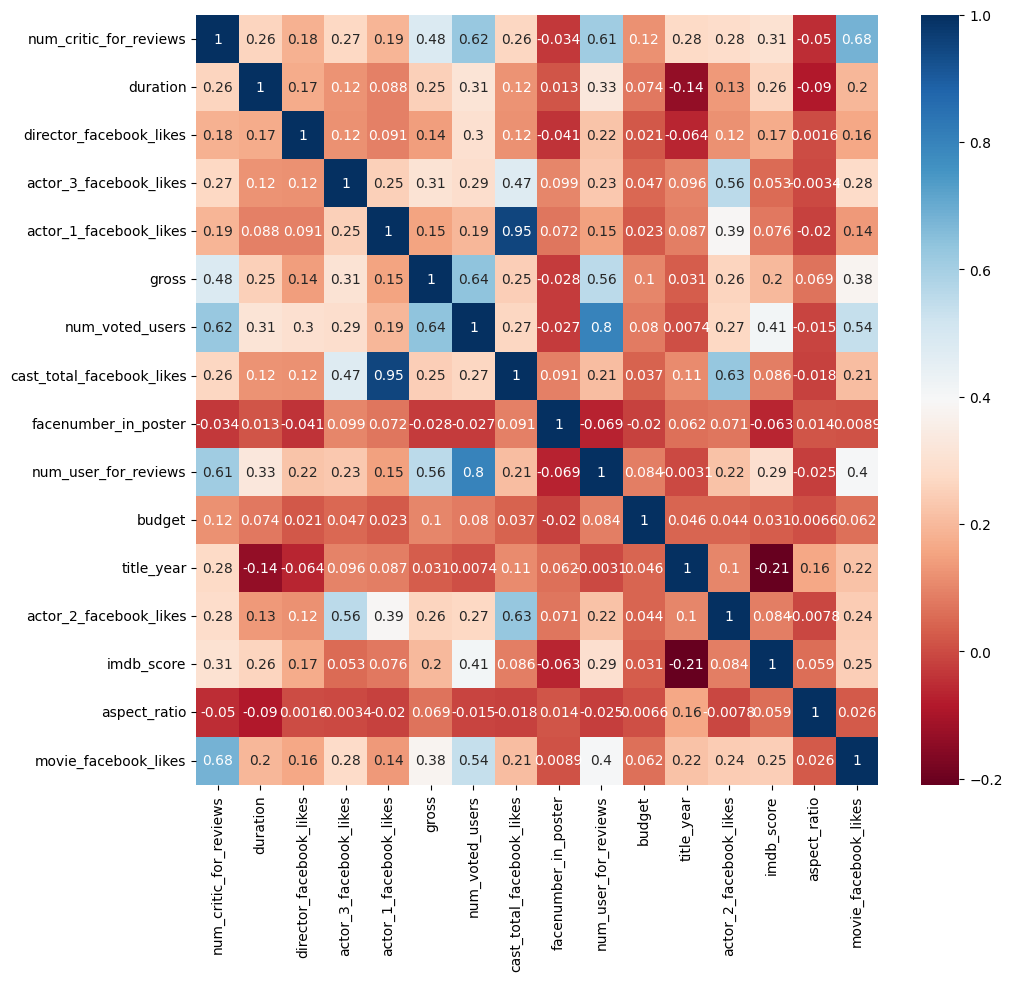

In [9]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (11, 10))
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');
plt.show()

Temos correlações consideráveis entre as diversas variáveis preditoras, mas nosso interesse nesta fase é a correlação com a variável alvo "imdb_score".

A correlação entre as demais variáveis preditoras será analisado na fase de pré-processamento de dados.





**Relação preditoras com alvo**

Neste estudo a seguir vamos avaliar o comportamento de todas as variaveis numéricas com a variável alvo "imdb_score".

Apresentando alguns gráficos de regressão entre a variável "imdb_score " e as demais.

In [10]:
# separando colunas categoricas e numericas para uma análise mais clara
cols_num = [column for column in ds.columns if ds[column].dtype != 'object']
cols_categoricas = [column for column in ds.columns if ds[column].dtype == 'object']
print(f'Numericas: {cols_num} \nCategoricas: {cols_categoricas}')

Numericas: ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'] 
Categoricas: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


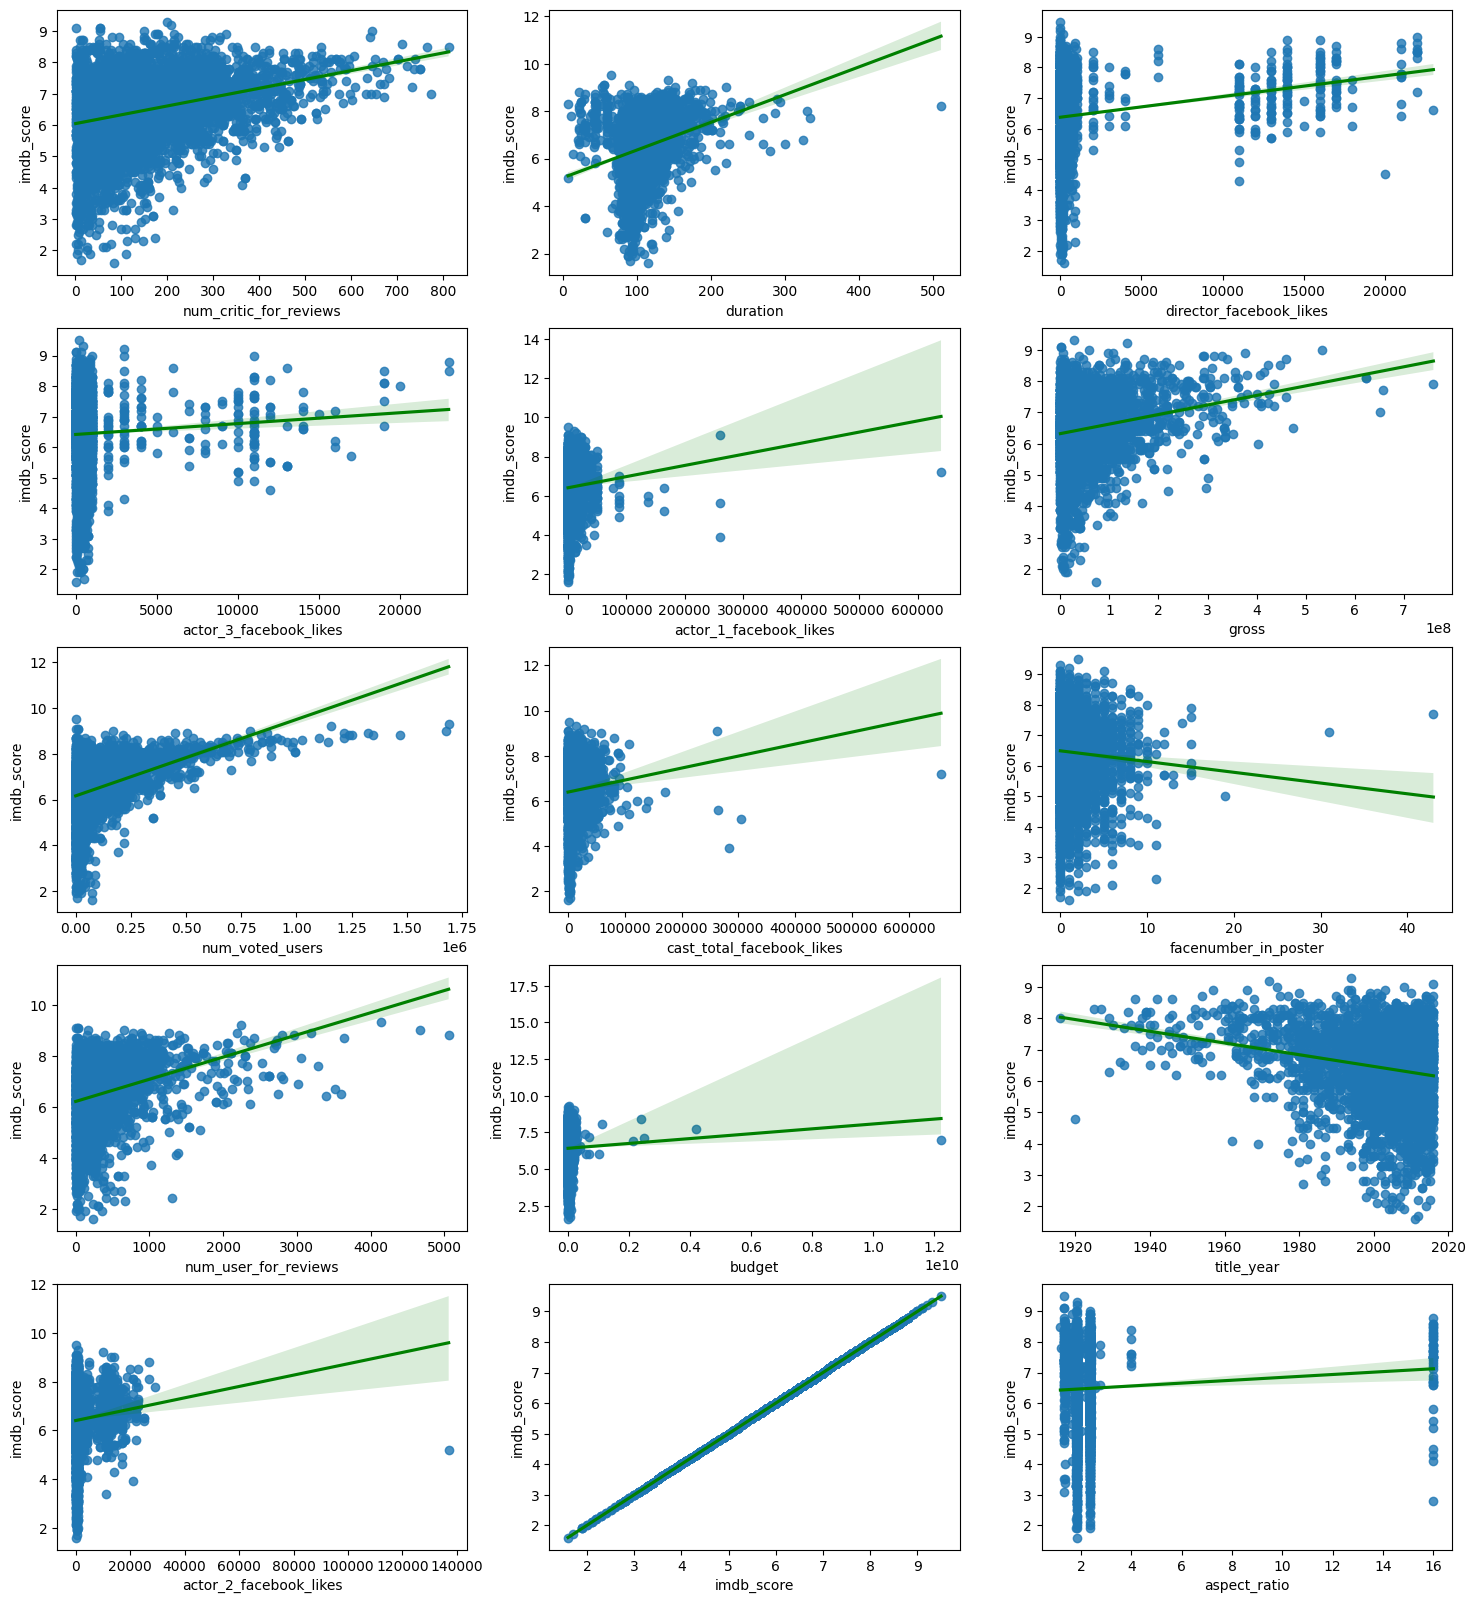

In [11]:
fig, ax = plt.subplots(round(len(cols_num) / 3), 3, figsize = (18, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cols_num) - 1:
        sns.regplot(x=cols_num[i],y='imdb_score', data=ds[cols_num], ax=ax,
                    label = cols_num, line_kws={'color':'green'})


---


**Percepção da análise Multimodal de correlação e regressão**

- Temos correlações consideráveis entre as diversas variáveis preditoras, mas nosso interesse nesta fase é a correlação com a variável alvo "imdb_score".

- A correlação entre as demais variáveis preditoras será analisado na fase de pré-processamento de dados.

- As variáveis 'num_critic_for_reviews', 'duration', 'gross', 'num_voted_users', 'num_user_for_reviews' apresentam uma aparente relação com "imdb_score", sendo assim importantes na construção do modelo.










---



## A4. Pré-Processamento de dados

Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 4.1 Tratamento de Missings e Limpeza

Nesta fase de limpeza iremos avaliar a possível ocorrência de nulls e/ou linhas duplicadas, e fazer os devidos ajustes, se necessário.

Etapas propostas:

1. Apagar colunas desnecessárias a análise;
2. Avaliar e tratar linhas com missings;
3. Avaliar e tratar linhas com zeros;
4. Alterar o nome de algumas colunas para facilitar a análise;
5. Analisar as variaveis categóricas.




---
**Criando um novo dataset db_clean**

Iniciando a criação de uma nova base limpa e sem missings a partir da base original chamada **ds_cleaned**



In [12]:
# salvando um novo dataset "ds_cleaned" para executar a limpeza
# recuperando os nomes das colunas
col = list(ds.columns)
# o novo dataset irá conter todas as colunas do dataset original
ds_cleaned = ds[col[:]]

print(f' dimensões do dataset antes da limpeza: {ds_cleaned.shape}')

 dimensões do dataset antes da limpeza: (5043, 28)


In [13]:
# Checando número de valores nulls nas colunas e duplicadas
print(f'\n*** Valores Nulos ***')
print(ds_cleaned.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds_cleaned.duplicated().sum())


*** Valores Nulos ***
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

*** Linhas duplicadas ***
45


**Tratando variáveis categóricas qualitativas**
- Análise de dimensionalidade das variáveis categóricas

In [14]:
# Verificando dimensionalidade das variaveis categóricas
d_categ = {}
for col in cols_categoricas:
#  d_categ[col]=ds_cleaned[col].nunique()
  print(f'{col}: {ds_cleaned[col].nunique()}')

color: 2
director_name: 2398
actor_2_name: 3032
genres: 914
actor_1_name: 2097
movie_title: 4917
actor_3_name: 3521
plot_keywords: 4760
movie_imdb_link: 4919
language: 47
country: 65
content_rating: 18


Da análise de dimensionalidade destas variáveis categóricas temos:
- As variáveis tem a dimensionalidade praticamente do dataset, então não contribuirão no modelo. Sendo assim serão ser descartadas.
- As variáveis 'actor_1_name', 'actor_2_name', 'actor_3_name' e 'director' tem um tamanho expressivo, e assim nao será possivel preservar estas linhas, visto que teríamos dificuldade em estabelecer a moda. Sendo assim serão eliminadas as linhas com missing nestas variáveis.
- Para as variáveis 'color', 'country' e language' devido a sua baixa dimensionalidade, serão usadas os valores da moda.
- Preenchimento dos missings da variável 'content_rating' pelo valor 'not rated'.
- A variável 'genres' não apresenta missings

In [15]:
# Apagando colunas com dimensionalidade alta
ds_cleaned.drop(['plot_keywords','movie_title', 'movie_imdb_link'], axis=1, inplace=True)

# apagando linhas com missing nas variáveis 'actor_1_name', 'actor_2_name', 'actor_3_name' e 'director'
ds_cleaned.dropna(subset = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'], inplace=True)

# substituindo valores categórico missing pela moda
ds_cleaned['color'].fillna(ds_cleaned['color'].mode()[0], inplace=True)
ds_cleaned['country'].fillna(ds_cleaned['country'].mode()[0], inplace=True)
ds_cleaned['language'].fillna(ds_cleaned['language'].mode()[0], inplace=True)

# preenchendo missings em 'content_rating' pelo valor 'not rated'
ds_cleaned['content_rating'].fillna('Not Rated', inplace = True)

**Tratando variáveis numéricas**
- Análise dos 0s (zeros)

Vamos tratar os valores missing e também os valores 0 (zero) que não fazem sentido.

Os valores 0 devem ser considerados como valor missing , exceto para o caso da variável preditora "facenumber_in_poster".

Assim, a sequencia da célula será:
- Substituir NA pela média da coluna para facenumber_in_poster;
- Substituir os 0s nas outras variáveis preditoras por NA ;
- Substituir variáveis preditoras pela mediana ou moda:
 - Substituição de variáveis numéricas pela mediana;
 - Substituição de variáveis categóricas qualitativas pela moda;
- Prrencher missing das variáveis que contém nomes de atores, diretor e "content_rating" por valores especificos;
- Retornar o 0(zero) válido em preditora "facenumber_in_poster".

In [16]:
# Como o zero aqui faz sentido, subsituindo missing pelo valor da mediana
ds_cleaned['facenumber_in_poster'].fillna(ds_cleaned['facenumber_in_poster'].median(), inplace=True)

# substituindo os zeros por NaN
ds_cleaned.replace(0, np.nan, inplace=True)

# Substituir algumas das variáveis numéricas pela mediana (pode haver outliers)
ds_cleaned['num_critic_for_reviews'].fillna(ds_cleaned['num_critic_for_reviews'].median(), inplace=True)
ds_cleaned['duration'].fillna(ds_cleaned['duration'].median(), inplace=True)
ds_cleaned['director_facebook_likes'].fillna(ds_cleaned['director_facebook_likes'].median(), inplace=True)
ds_cleaned['actor_1_facebook_likes'].fillna(ds_cleaned['actor_1_facebook_likes'].median(), inplace=True)
ds_cleaned['actor_2_facebook_likes'].fillna(ds_cleaned['actor_2_facebook_likes'].median(), inplace=True)
ds_cleaned['actor_3_facebook_likes'].fillna(ds_cleaned['actor_3_facebook_likes'].median(), inplace=True)
ds_cleaned['movie_facebook_likes'].fillna(ds_cleaned['movie_facebook_likes'].median(), inplace=True)
ds_cleaned['cast_total_facebook_likes'].fillna(ds_cleaned['cast_total_facebook_likes'].median(), inplace=True)
ds_cleaned['num_user_for_reviews'].fillna(ds_cleaned['num_user_for_reviews'].median(), inplace=True)
ds_cleaned['title_year'].fillna(ds_cleaned['title_year'].median(), inplace=True)
ds_cleaned['aspect_ratio'].fillna(ds_cleaned['aspect_ratio'].mode()[0], inplace=True)

# preenchendo missings nos nomes dos atores e diretor com 'unknown'
# ds_cleaned['actor_1_name'].fillna('Unknown', inplace = True)
# ds_cleaned['actor_2_name'].fillna('Unknown', inplace = True)
# ds_cleaned['actor_3_name'].fillna('Unknown', inplace = True)
# ds_cleaned['director_name'].fillna('Unknown', inplace = True)

# retornando os valores 0 da variavel 'facenumber_in_poster'
ds_cleaned['facenumber_in_poster'].fillna(0, inplace=True)

# Apagando linhas de 'budget', 'gross' com valores missing
ds_cleaned.dropna(subset = ['budget', 'gross'], inplace=True)

**Apagando linhas duplicadas**


In [17]:
# Apagando linhas duplicadas
ds_cleaned.drop_duplicates(inplace = True)

**Confirmando a ausência de missings**

<Axes: >

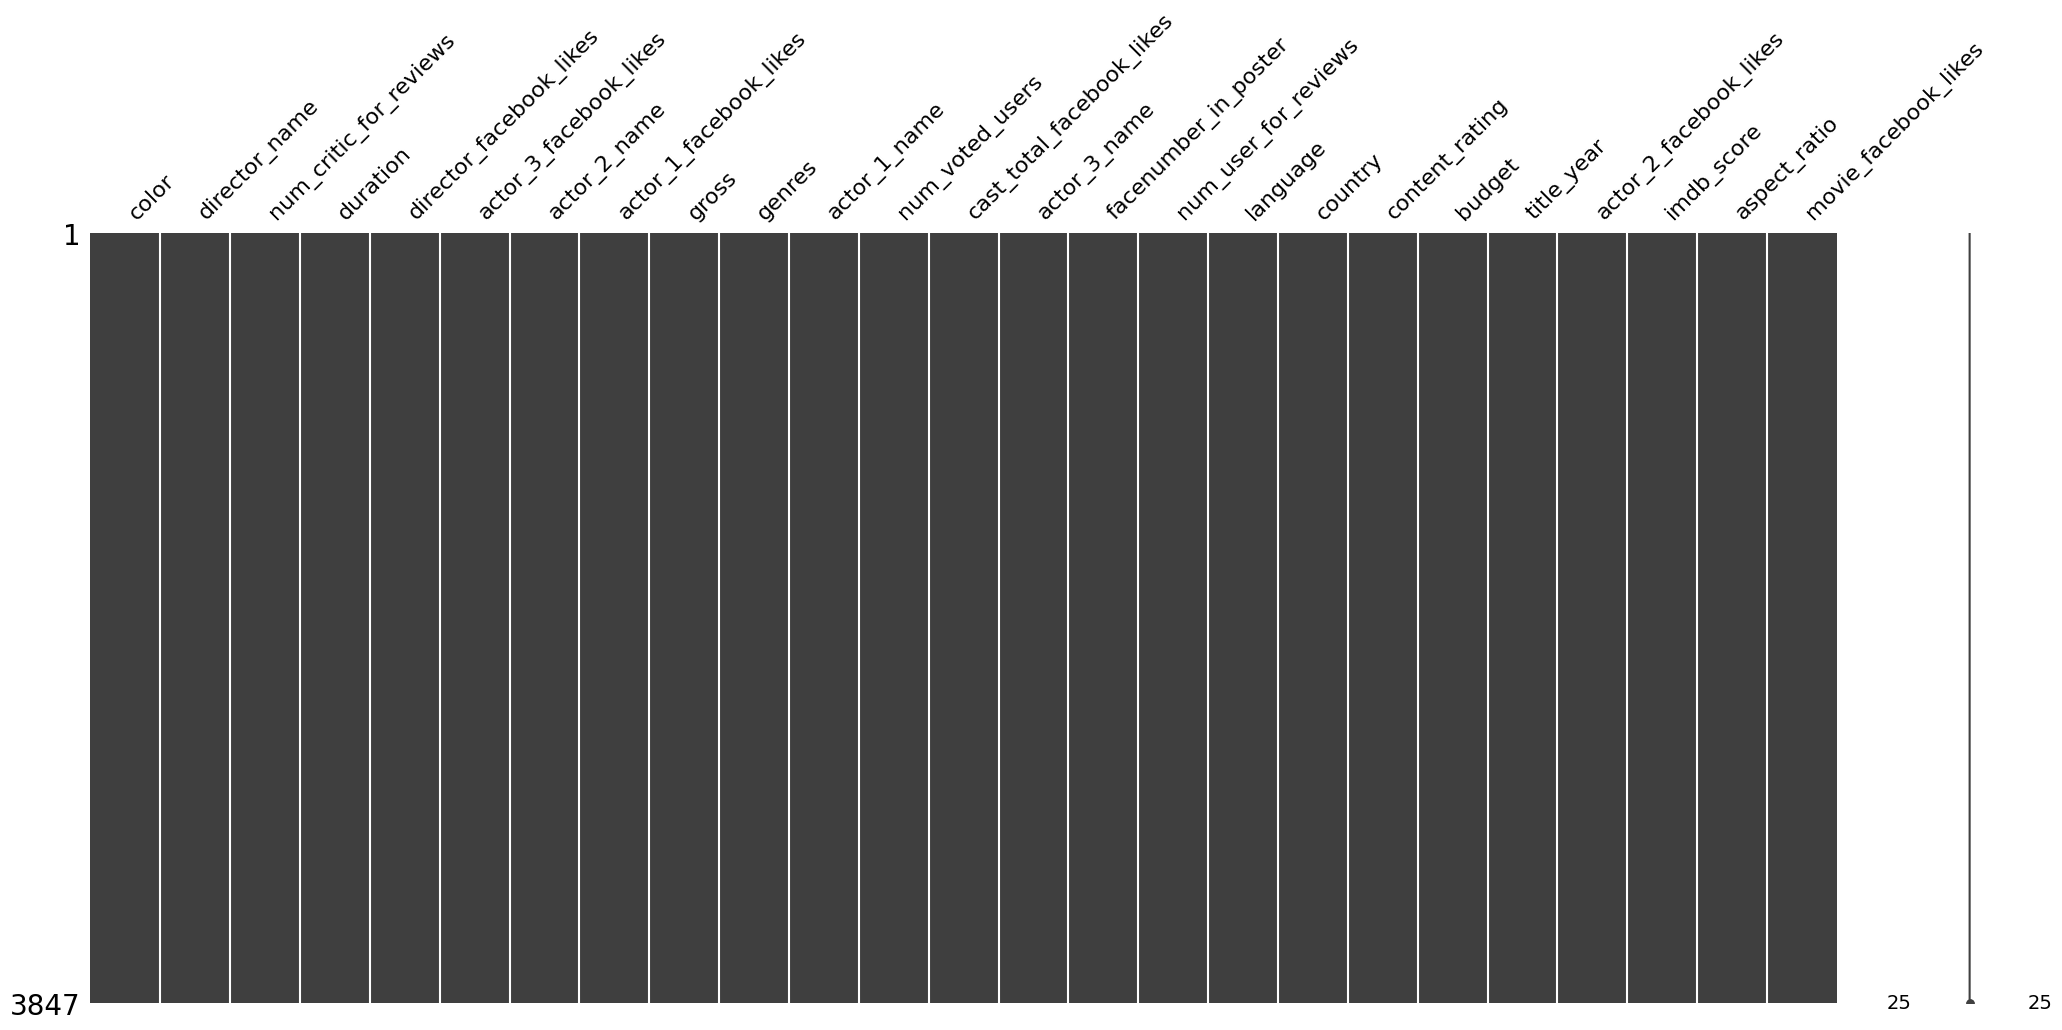

In [18]:
# Confirmando a não existencia de missings
#ds_cleaned.isnull().sum()
#ds_cleaned.isna().any()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_cleaned)

**Escalando variaveis para o modelo**

In [19]:
ds_cleaned['budget']=ds_cleaned['budget'] / 1000000
ds_cleaned['gross']=ds_cleaned['gross'] / 1000000

In [20]:
# Checando
ds_cleaned.isna().any()

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

**Valores finais da based limpa**

In [21]:
# Tamanho da base limpa
ds_cleaned.shape

(3847, 25)

### 4.2 Tratamento de variáveis categóricas e numéricas
Na etapa de tratamento de variáveis tratamos das variáveis categóricas, no que diz respeito  a sua dimensionalidade, e também das variáveis numéricas com respeito a possível correlação entre elas, visando melhorar as entradas para o futuro modelo.





**Transformação das variáveis categóricas**

Preparando um novo dataset "dsmodel" para ser utilizado no modelo

In [22]:
dsmodel=ds_cleaned[:]

**Redução da Dimensionalidade de Variáveis Categóricas**
- Verificando possibilidade de redução da dimensionalidade (quantidade de classes) das variáveis 'language' e 'country'.


In [23]:
dsmodel['country'].value_counts()

USA               3042
UK                 319
France             105
Germany             81
Canada              63
Australia           41
Spain               22
Japan               17
China               14
Hong Kong           13
India               13
Mexico              11
New Zealand         11
Italy               11
Denmark              9
South Korea          9
Ireland              7
Brazil               5
Norway               4
Iran                 4
Thailand             4
South Africa         3
Argentina            3
Czech Republic       3
Netherlands          3
Russia               3
Taiwan               2
Iceland              2
Belgium              2
Israel               2
Hungary              2
Romania              2
Poland               1
Indonesia            1
Colombia             1
Afghanistan          1
Sweden               1
Chile                1
Finland              1
Georgia              1
West Germany         1
Official site        1
Greece               1
Aruba      

Do resultado, podemos observar que a maioria dos filmes é produzida nos EUA, e Reino Unido(cerca de 85%). Assim vamos substituir os outros por 1 categoria chamada 'other'

In [24]:
#Substituindo valores (exceto USA e UK) por 'other'
countries = ['USA','UK', 'France']
dsmodel['country'] = dsmodel['country'].where(dsmodel['country'].isin(countries), 'other')
dsmodel['country'].value_counts()

USA       3042
other      381
UK         319
France     105
Name: country, dtype: int64

In [25]:
dsmodel['language'].value_counts()

English       3668
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Hebrew           2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

Da saída acima, podemos observar que a maioria dos filmes tem o inglês como idioma (cerca de 95%). Assim vamos substituir os outros por 1 categoria chamada 'other'

In [26]:
#Substituindo todos os valores (exceto 'English') por 'other'
most_occurred_language = ['English']
dsmodel['language'] = dsmodel['language'].where(dsmodel['language'].isin(most_occurred_language), 'other')
dsmodel['language'].value_counts()

English    3668
other       179
Name: language, dtype: int64

**Checando e tratando correlações entre as variáveis preditoras numéricas**

<Axes: >

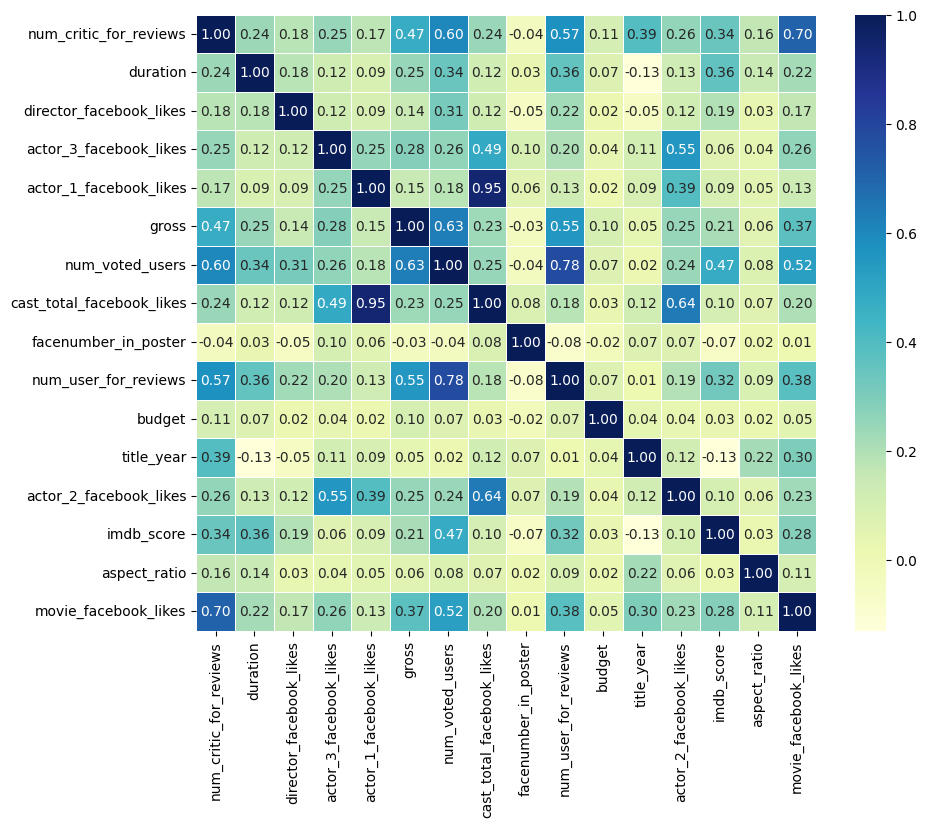

In [27]:
correlation = dsmodel.corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", linewidths=.5,fmt='.2f')

No resultado acima observa-se que 'actor_1_facebook_likes' e 'cast_total_facebook_likes' são altamente correlacionados entre si.

Então iremos apagar 'cast_total_facebook_likes'

In [28]:
# apagando coluna com alta correlação
dsmodel.drop('cast_total_facebook_likes',axis=1,inplace=True)



---





### 4.3 Separando os conjuntos de treino e de teste




Nesta fase iremos estabelecer os dados de treino e de testes. Os dados de treino  será usado no treino do futuro modelo preditivo e os de testes serão usados para aferir a eficácia do modelo escolhido.


> A variável alvo é "imdb_score".




**Separando as variáveis preditoras e alvo**
- Separando dados de treino 80% e teste 20%
- Criando folds para validação cruzada

In [29]:
# Especificando as colunas a serem usadas no treino
col_y = ['imdb_score']

# Separando atributos preditores e alvo
X = dsmodel[:].drop(col_y, axis = 1)  # variaveis preditoras
y = dsmodel[col_y[:]] # variavel alvo

# definindo parametros de teste/treino
test_size = 0.20 # tamanho do conjunto de testes.
seed = 7 # semente geradora dos numeros aleatórios

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}\nX_test: {X_test.shape}, y_test: {y_test.shape}')

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

X_train: (3077, 23), y_train: (3077, 1)
X_test: (770, 23), y_test: (770, 1)


**Transformação das variáveis categóricas**
- Antes de comerçarmos a transformação vamos verificar se algum atributo provocará uma distribuição de dados desbalanceada entre dados de treino e de teste
- Para isto vamos checar se as categorias existentes nos dados de treino também aparecem nos dados de teste

ONE HOT ENCODING

In [30]:
# Listando os atributos categóricos
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Colunas categóricas que serão codificadas com one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Colunas categóricas que serão descartadas
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Colunas categóricas que serão codificadas via one-hot encoding:', low_cardinality_cols)
print('\nColunas categóricas que serão descartadas do dataset:', high_cardinality_cols)

# Novo nomedas colunas codificadas
cat_cols = low_cardinality_cols
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(X_train[col].unique())]

print(f'novos nomes de colunas:{cat_cols_encoded}')

Colunas categóricas que serão codificadas via one-hot encoding: ['color', 'language', 'country']

Colunas categóricas que serão descartadas do dataset: ['director_name', 'actor_1_name', 'content_rating', 'actor_3_name', 'actor_2_name', 'genres']
novos nomes de colunas:['c_Color', 'c_ Black and White', 'l_English', 'l_other', 'c_UK', 'c_USA', 'c_other', 'c_France']


In [31]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]), columns=cat_cols_encoded)
OH_cols_test  = pd.DataFrame(OH_encoder.fit_transform(X_test[low_cardinality_cols]), columns=cat_cols_encoded)

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
X_train.drop(object_cols, axis=1, inplace=True)
X_test.drop(object_cols, axis=1, inplace=True)

# Add one-hot encoded columns to numerical features
X_train = X_train.join(OH_cols_train)
X_test = X_test.join(OH_cols_test)

#checando o tamanho
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (3077, 22)
X_test: (770, 22)


### **4.4 Selecionando atributos**
Preparando a função para a avaliação e a seleção dos atributos mais adequados para uso no modelo.

Esta função será utilizada para testarmos diversos valores para k, levando a uma melhor escolha dos atributos.

In [32]:
# Função SelectKBest
def selectk_best(num_atributos, imprime):
# Seleção de atributos com SelectKBest
  best_var = SelectKBest(score_func=f_regression, k=num_atributos)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
  fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
  features = fit.transform(X_train)

# Resultados
  # print('\nNúmero original de atributos:', X_train.shape[1])
  print('\n\033[1mNúmero reduzido de atributos:', features.shape[1], '\033[0m')

# Exibe os atributos orginais
  if imprime:
    print("\n\033[1mAtributos Originais:\033[0m", X_train.columns)

# Exibe as pontuações de cada atributos e os escolhidos (com as pontuações mais altas)

  np.set_printoptions(precision=3) # 3 casas decimais
  ncol_X= best_var.get_feature_names_out(input_features=X_train.columns)
  if imprime:
    print("\n\033[1mScores dos Atributos Originais:\033[0m", fit.scores_)
    print("\n\033[1mAtributos Selecionados:\033[0m",ncol_X)

  return ncol_X, best_var

## A5. Modelagem e Inferência




### 5.1 Criação e avaliação de modelos: linha base

**Modelagem Inicial**

Para a base de treino, serão utilizados os algoritmos de ML para regressão abaixo para se avaliar o MSE e o RMSE dos modelos treinados:

- Regressão linear;
- Regressão linear com regularização Ridge;
- Regressão linear com regularização Lasso;
- KNN;
- árvore de regressão;
- SVM

**Determinando a quantidade ótima de parâmetros a serem usados no treino dos modelos**

Nesta etapa, utilizando a função selectk_best definida anteriormente serão avaliados diversos valores de atributos para buscar aquele cuja a seleção dê o menor MSE.

 Número original de atributos:   22 


Número reduzido de atributos: 6 
LR: MSE 0.782 (0.085) - RMSE 0.884
Ridge: MSE 0.782 (0.085) - RMSE 0.884
Lasso: MSE 0.784 (0.085) - RMSE 0.886
KNN: MSE 0.980 (0.116) - RMSE 0.990
CART: MSE 1.190 (0.118) - RMSE 1.091
SVM: MSE 0.848 (0.095) - RMSE 0.921

Número reduzido de atributos: 8 
LR: MSE 0.753 (0.080) - RMSE 0.868
Ridge: MSE 0.753 (0.080) - RMSE 0.868
Lasso: MSE 0.785 (0.084) - RMSE 0.886
KNN: MSE 0.967 (0.102) - RMSE 0.984
CART: MSE 1.163 (0.111) - RMSE 1.078
SVM: MSE 0.845 (0.094) - RMSE 0.919

Número reduzido de atributos: 10 
LR: MSE 0.721 (0.077) - RMSE 0.849
Ridge: MSE 0.721 (0.077) - RMSE 0.849
Lasso: MSE 0.769 (0.083) - RMSE 0.877
KNN: MSE 0.967 (0.101) - RMSE 0.983
CART: MSE 1.093 (0.100) - RMSE 1.045
SVM: MSE 0.845 (0.094) - RMSE 0.919

Número reduzido de atributos: 12 
LR: MSE 0.713 (0.075) - RMSE 0.845
Ridge: MSE 0.713 (0.076) - RMSE 0.845
Lasso: MSE 0.769 (0.083) - RMSE 0.877
KNN: MSE 0.967 (0.101) - RMSE 0.983
CART: MSE 1.144 (

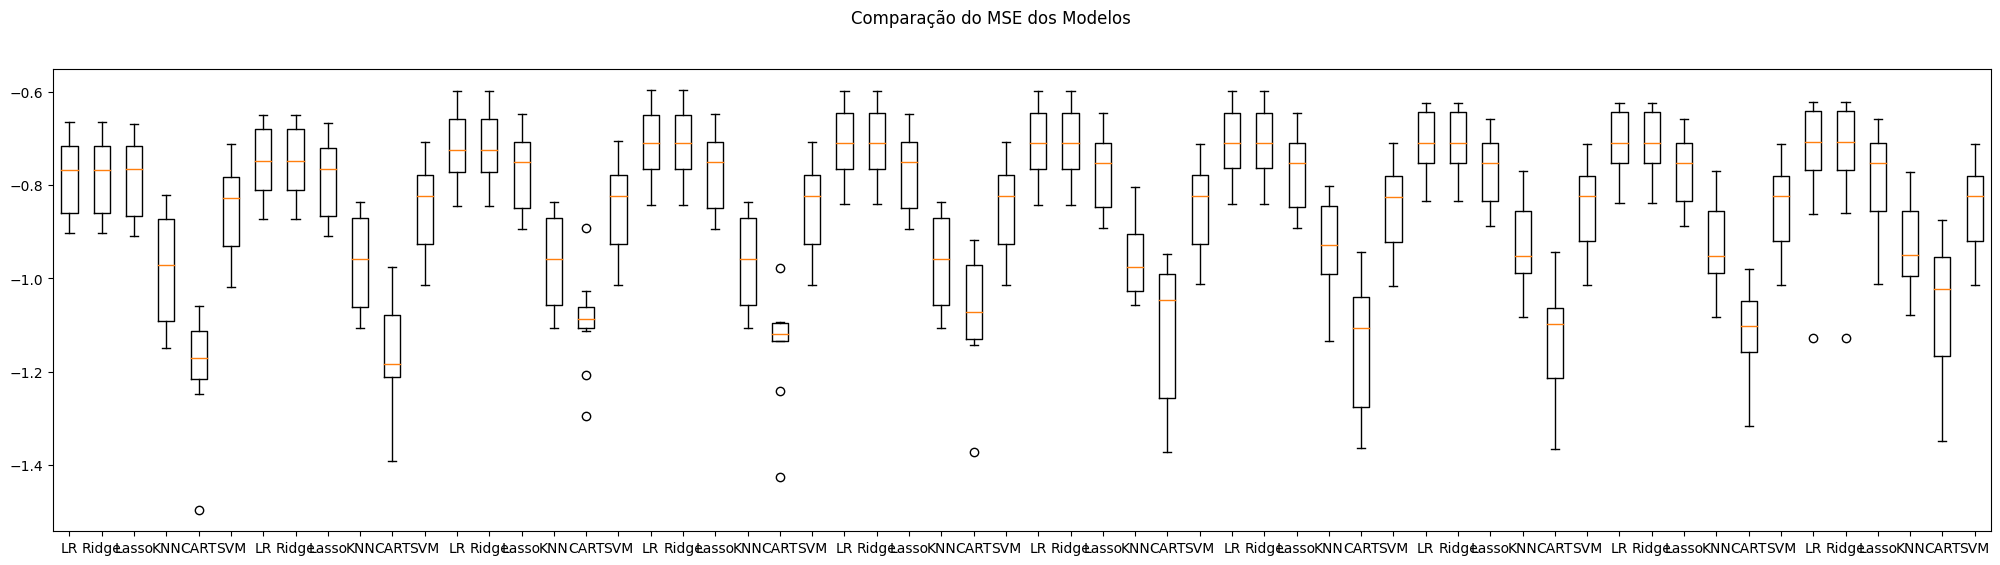

In [33]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Valores de k a serem testados
k_values = (6, 8, 10, 12, 14, 15, 16, 18, 20, 22)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))


print('\033[1m Número original de atributos: \033[0m ', X_train.shape[1], '\n')
# Testando o conjunto de atributos selecionados
for i in k_values:
  col_sel, fs_sel = selectk_best(i, False)
  X_train_base = X_train[col_sel[:]]# variaveis preditoras
  X_test_base = X_test[col_sel[:]]# variaveis preditoras

# Avaliando um modelo por vez
  for name, model in models:
    cv_results = cross_val_score(model, X_train_base, y_train, cv=kfold,
                                 scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos resultados da validação cruzada
    msg = "%s: MSE %0.3f (%0.3f) - RMSE %0.3f" % (name, abs(cv_results.mean()),
                                                  cv_results.std(),
                                                  np.sqrt(abs(cv_results.mean())))
    print(msg)

# Boxplot de comparação dos modelos
fig=plt.figure(figsize=(25,6))
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Utilizando 18 atributos, os modelos de Regressão linear e Regressão linear com regularização Ridge apresentaram resultados semelhantes. Como referência vamos utilizar o modelo Regressão linear.

Preparando o dataframe com as colunas selecionadas


Número reduzido de atributos: 18 

Atributos Originais: Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes', 'c_Color', 'c_ Black and White', 'l_English',
       'l_other', 'c_UK', 'c_USA', 'c_other', 'c_France'],
      dtype='object')

Scores dos Atributos Originais: [395.605 468.658 122.853  18.25   23.26  140.025 881.164  11.685 341.973
   2.108  48.951  30.047   3.403 259.924  40.698  40.698  91.898  91.898
   6.337  33.331  48.091   7.243]

Atributos Selecionados: ['num_critic_for_reviews' 'duration' 'director_facebook_likes'
 'actor_3_facebook_likes' 'actor_1_facebook_likes' 'gross'
 'num_voted_users' 'facenumber_in_poster' 'num_user_for_reviews'
 'title_year' 'actor_2_facebook_likes' 'movie_facebook_likes' 'c_Color'
 

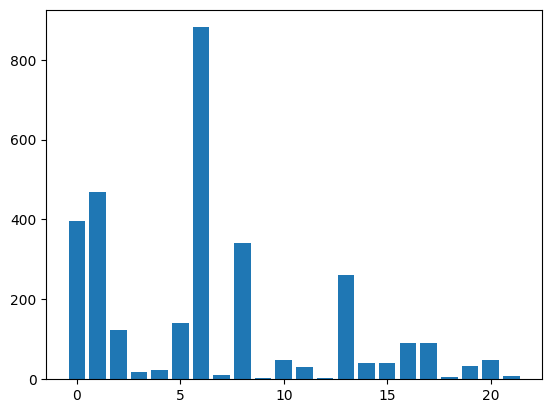

In [34]:
ncol_X, fs = selectk_best(18, True)
# novo conjunto de atributos selecionados
X_train = X_train[ncol_X[:]]# variaveis preditoras
X_test = X_test[ncol_X[:]]# variaveis preditoras

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Construindo um novo modelo baseado em regressão Linear com todo conjunto de treino, para então ser avaliado utilizando a base de teste.

In [35]:
# Criando um modelo LR com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.63
RMSE 0.80


### 5.3 Criação e avaliação de modelos: pipelines
Nesta sessão iremos montar um pipeline de testes dos modelos, utilizamod os dados de treino em 3 formas: raw (sem transformação), padronizados e normalizados.
O objetivo é elencar qual(ais) os modelos tem maior acurácia.

LR-orig: -0.841 (0.040)
Ridge-orig: -0.841 (0.040)
Lasso-orig: -0.876 (0.044)
CART-orig: -1.059 (0.058)
KNN-orig: -0.963 (0.056)
SVR-orig: -0.918 (0.050)
LR-padr: -0.841 (0.040)
Ridge-padr: -0.841 (0.040)
Lasso-padr: -1.059 (0.038)
CART-padr: -1.063 (0.059)
KNN-padr: -0.871 (0.048)
SVR-padr: -0.796 (0.056)
LR-norm: -0.841 (0.040)
Ridge-norm: -0.842 (0.043)
Lasso-norm: -1.059 (0.038)
CART-norm: -1.056 (0.064)
KNN-norm: -0.847 (0.043)
SVR-norm: -0.835 (0.052)


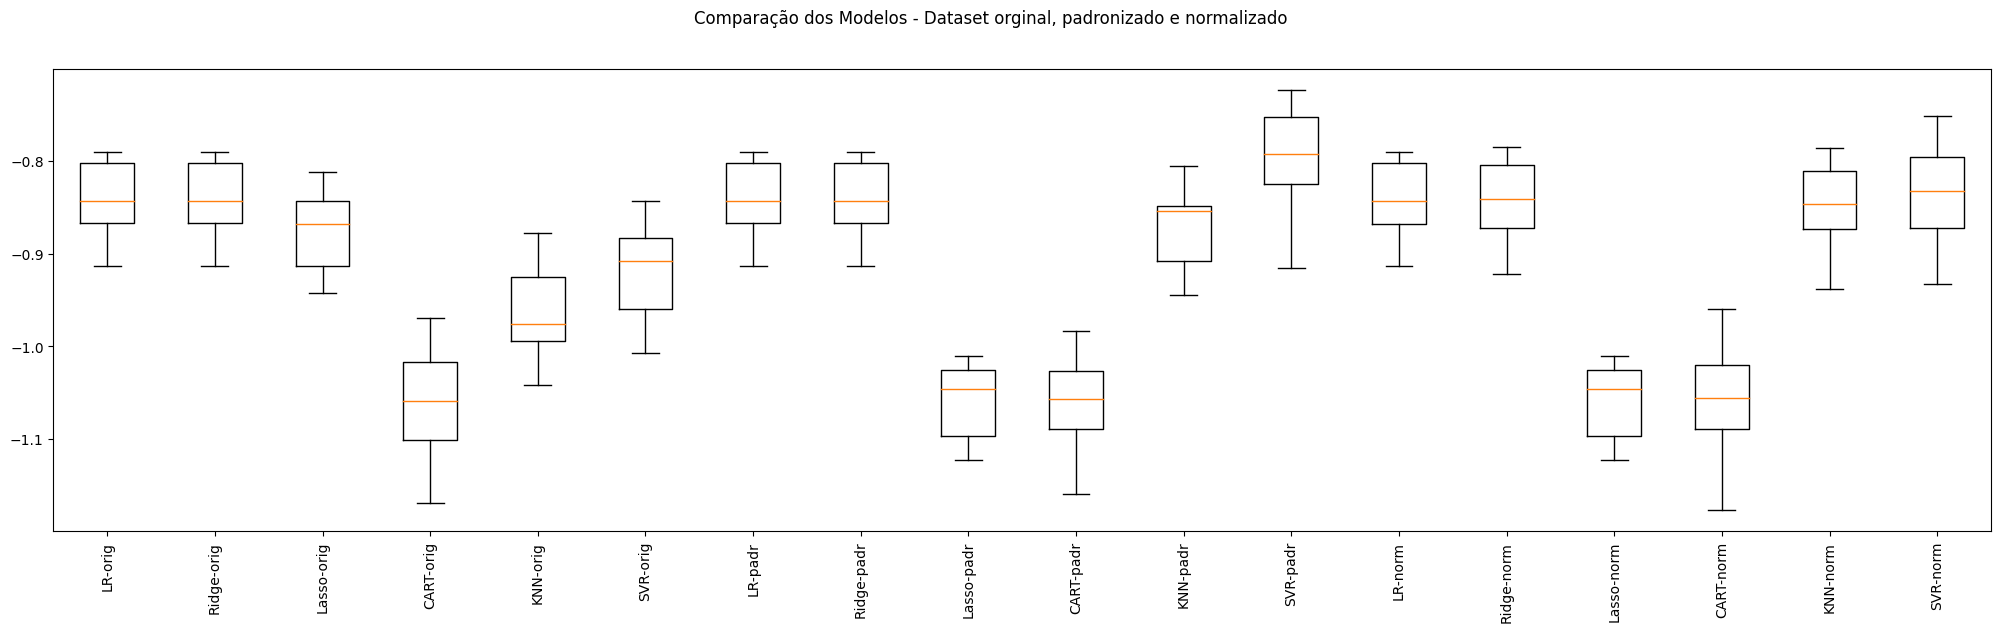

In [36]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
linear_reg = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
cart = ('CART', DecisionTreeRegressor())
knn_reg = ('KNN', KNeighborsRegressor())
svr = ('SVM', SVR())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([linear_reg])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('Lasso-orig', Pipeline([lasso])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('KNN-orig', Pipeline([knn_reg])))
pipelines.append(('SVR-orig', Pipeline([svr])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, linear_reg])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, lasso])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn_reg])))
pipelines.append(('SVR-padr', Pipeline([standard_scaler, svr])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, linear_reg])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, lasso])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn_reg])))
pipelines.append(('SVR-norm', Pipeline([min_max_scaler, svr])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

O modelo com algoritmo SVM (SVR) com dados padronizados apresentou a melhor performance dentre os modelos de regressão avaliados.

### 5.4 Otimização dos hiperparâmetros
Nesta fase iremos utilizar os resultados obtidos nos pipelines de avaliação de modelo, procurando otimiza-lo ainda mais por meio de alterações dos hiperparâmetros.

Utilizando a melhor configuração de regressor



In [37]:
# Tuning do SVC

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svr = ('SVM', SVR())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svr-orig', Pipeline(steps=[svr])))
pipelines.append(('svr-padr', Pipeline(steps=[standard_scaler, svr])))
pipelines.append(('svr-norm', Pipeline(steps=[min_max_scaler, svr])))

# param_grid = { 'SVM__C': [0.1, 1, 10, 100, 1000],
#              'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'SVM__kernel': ['rbf','linear']}

param_grid = { 'SVM__C': [0.1, 1, 10, 100, 1000],
               'SVM__kernel': ['rbf']}


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

svr-orig - Melhor: -0.902745 usando {'SVM__C': 1000, 'SVM__kernel': 'rbf'}
svr-padr - Melhor: -0.789573 usando {'SVM__C': 10, 'SVM__kernel': 'rbf'}
svr-norm - Melhor: -0.811869 usando {'SVM__C': 100, 'SVM__kernel': 'rbf'}


### 5.5 Finalização do Modelo
FInalizando o modelo, iremos utilizar os resultados e respectivos hiperparâmetros, aplica-los na massa de teste e rodar a predição.

Como não podemos calcular a precisão de um modelo de regressão, vamos utilizar o erro quadrático médio (MSE) e a
raiz do erro quadrático médio (RMSE) como indicadores de desempenho do modelo

In [38]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model=SVR(C=10, kernel='rbf')# utilizando hiperparametros definidos no treino
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.53
RMSE 0.73


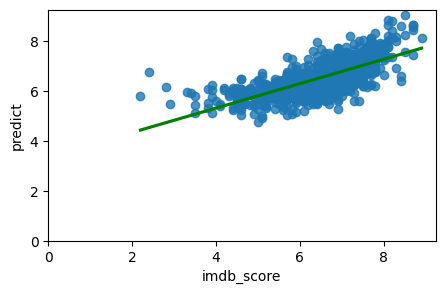

In [40]:
# plotando predicao x real
y1 = y_test[:]
y1['predict'] = predictions[:]

plt.figure(figsize = (5,3))
sns.regplot(data=y1, x='imdb_score', y='predict', ci=None, line_kws={'color':'green'})
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

## **A6. Conclusão**



---
**Contexto**

O objetivo desta análise foi o de buscar prever a pontuação IMDB de um determinado filme, dados diversos atributos disponíveis. O dataset utilizado foi “IMDB 5000 Movie Dataset” com 28 atributos em 5043 registros.  A variável alvo definida foi “imdb_score”. Este é um problema de aprendizado supervisionado por regressão.
As variáveis disponíveis no dataset foram:
1.	movie_title - Título do filme
2.	duration - Duração em minutos
3.	director_name - Nome do Diretor do Filme
4.	director_facebook_likes - Número de curtidas do Diretor em sua página no Facebook
5.	actor_1_name - Ator principal estrelando o filme
6.	actor_1_facebook_likes - Número de curtidas do Ator 1 em sua página no Facebook
7.	actor_2_name - Outro ator estrelando o filme
8.	actor_2_facebook_likes - Número de curtidas do Ator 2 em sua página no Facebook
9.	actor_3_name - Outro ator estrelando o filme
10.	actor_3_facebook_likes - Número de curtidas do Ator 3 em sua página no Facebook
11.	num_user_for_reviews - Número de usuários que deram uma avaliação
12.	num_critic_for_reviews - Número de resenhas críticas no imdb
13.	num_voted_users - Número de pessoas que votaram no filme
14.	cast_total_facebook_likes - Número total de curtidas no Facebook de todo o elenco do filme
15.	movie_facebook_likes - Número de curtidas no Facebook na página do filme
16.	plot_keywords - Palavras - chave que descrevem o enredo do filme
17.	facenumber_in_poster - Número do ator que apareceu no pôster do filme
18.	color - Colorização de filmes (P&B ou 'Cores')
19.	genres - Gênero do filme ('Animação', 'Comédia', 'Romance', 'Terror', 'Sci - Fi', 'Ação', 'Família')
20.	title_year - O ano em que o filme foi lançado (entre 1916 e 2016)
21.	language - linguagem do filme
22.	country - País onde o filme foi produzido
23.	content_rating - Classificação do conteúdo do filme
24.	aspect_ratio - Proporção de tela em que o filme foi feito
25.	movie_imdb_link - Link para IMDB do filme
26.	gross - Receita bruta do filme em dólares
27.	budget - Orçamento do filme em dólares
28.	imdb_score - Pontuação IMDB do filme no IMDB

**A análise exploratória**

A análise exploratória de dados incluiu a análise unimodal e multimodal. Os principais achados e percepções foram:

- Temos um dataset com 28 colunas com 5043 instâncias
- Do total de 28 variáveis, onde 12 são do tipo object qualitativas e 16 quantitativas numéricas
- Os valores mínimos em 0 (zero) pode indicar erros nas diversas variáveis numéricas, que devem ser analisados na fase de pré-processamento de dados.
- As variáveis são unimodais, sendo que as variáveis "imdb_score" e "duration" apresentam com um comportamento aproximado de uma curva normal. As demais apresentam skew, com um comportamento parecido com exponencial, indicando uma distribuição assimétrica dos dados.
- Temos correlações consideráveis entre as diversas variáveis preditoras, mas nosso interesse nesta fase é a correlação com a variável alvo "imdb_score".
- As variáveis 'num_critic_for_reviews', 'duration', 'gross', 'num_voted_users', 'num_user_for_reviews' apresentam uma aparente relação com "imdb_score", sendo assim importantes na construção do modelo

Durante o pré-processamento dos dados foram realizadas atividades de limpeza e tratamento de missings, onde foram executadas atividades que incluíram apagar colunas desnecessárias a análise, avaliar e tratar linhas com missings, avaliar e tratar linhas com zeros, alterar o nome de algumas colunas para facilitar a análise e analisar as variáveis categóricas.
Também foram tratadas as variáveis categóricas onde separamos aquelas com dimensionalidade útil ao modelo, procedendo então para sua transformação via OenHotEncoding.

**Pré-processamento dos dados**
A base de dados estava muito fragmentada, com muito missings e valores 0(zero) sem sentido, que foram devidamente tratados. Em seguida as colunas categóricas foram tratadas, eliminando quase todas a exceção de 3 em função da respectiva quantidade de classes (dimensionalidade). Estas variáveis categóricas selecionadas foram então transformadas via OneHotEncoding. Por fim tratamos em seguidas as variáveis numéricas com alta correlação resultando a eliminação de uma delas.

**Dados de treino/teste**

Terminando o pré-processamento dos dados, procedemos a separação dos dados de treino e teste, na proporção 80/20, e criamos 10 folds validação cruzada. Em seguida foi feita a avaliação e seleção dos atributos a serem utilizados no modelo, onde foram selecionados empiricamente aqueles que trouxeram um menor MSE na simulação base do modelo.

**Treinamento do modelo**

Para treinamento do modelo foram utilizados os algoritmos de Machine Learning para regressão abaixo:
•	Regressão linear;
•	Regressão linear com regularização Ridge;
•	Regressão linear com regularização Lasso;
•	KNN;
•	árvore de regressão;
•	SVM

Foram executados então pipelines com os algoritmos acima, utilizando os dados em sua forma não tratada, normalizados e padronizados, a fim de avaliar qual combinação traz o melhor resultado ao modelo. Esta análise mostrou que o modelo utilizando o algoritmo SVM (SVR) com dados padronizados apresentou a melhor performance dentre os modelos de regressão avaliados.

Otimização de Hiperparâmetros
Para teste de otimização dos hiperparâmetros do algoritmo SVM utilizamos os seguintes parâmetros:
•	C: [0.1, 1, 10, 100, 1000],
•	gamma: [1, 0.1, 0.01, 0.001, 0.0001],
•	kernel: ['rbf','linear']

Neste caso vale observar que esta fase tomou um tempo excessivo, especialmente na variação do kernel. A resposta sempre foi a mesma (C=10, kernel=’rfb’). Como o notebook foi rodado por várias vezes e para uma possível validação do notebook pelos professores, deixei apenas os parâmetros C e gama na célula.

**Resultados**

Os dados de teste foram aplicados ajustados usando os resultados do treinamento e aplicados ao modelo treinado e foi obtido um MSE 0.54 e um RMSE 0.73 que são valores aceitáveis.

**Palavras finais**

Foi possível criar um modelo para a predição do imdb de um filme a partir das diversas informações dele (atributos preditores). Este modelo de regressão foi baseado no algoritmo SVM, atingiu um MSE 0.54, que pode ser melhorado  para obter um melhor modelo de previsão.

Desta forma, a sugestão para melhoria do modelo seria buscar uma base de dados maior, e com outras possíveis variáveis preditoras, como “autor”, “empresa produtora”, “índice Metascore”, entre outros.


---



# **B. MVP DEEP LEARNING**

## ROBERTO HARKOVSKY DA CUNHA

### Base IMDB Dataset of 50K Movie Reviews

## B1. Definição do problema

A indústria de entretenimento cinematográfico busca gerar conteúdos que entretenham seu público. Mas apenas alguns dos filmes são bem-sucedidos, obtendo uma pontuação alta de sites especializados como IMDB, Rotten tomatos, etc... A classificação obtida nesses sites mensura o sucesso do referido filme, dando-lhe uma pontuação de 0 a 10, com base nas estrelas dadas pelos espectadores. Contudo, não há nenhum método que possa prever o sucesso com base nas resenhas críticas dos filmes. Então, para determinar o sucesso do filme com base nas suas críticas, uma análise de sentimento deveria ser realizada. A análise de sentimento é uma técnica para analisar um fragmento de um texto a fim de determinar o sentimento contido nele.


**Sobre o dataset:**

O dataset escolhido para este estudo é o "IMDB Dataset of 50K Movie Reviews" do Kaggle, com cerca de 50.000 críticas de filmes que foram pré-rotuladas com classes de sentimento “positivo” e “negativo”, para uso em modelos de processamento de linguagem natural ou análise de texto. Este database possui os seguintes atributos:
1.	Review - Critica textual do filme
2.	Sentiment - classificação do sentimento da crítica do filme: positiva ou negativo (positive ou negative)

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

O objetivo deste projeto é prever o sentimento a partir de críticas (“reviews”) em inglês de filmes a partir dos dados obtidos do IMDb (Internet Movie Database), por meio do uso de uma arquitetura de rede neural LSTM (Long Short-Term Memory).



## B2. Carga de dados
Nesta  etapa será feita a importação dos pacotes necessários a análise, e a carga do dataset.

### Importando Biliotecas

Importanto as bibliotecas complementares neste notebook para o desenvolvimento do deep learning

In [1]:
import re
import nltk
import random

from scipy import stats

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### *Preparando o Dataset*

In [2]:
# conexão com GDrive
from google.colab import drive
drive.mount('/content/gdrive')
arquivo = "IMDB Dataset.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo

# # Conexão com GitHub
# arquivo = "movie_metadata.csv"
# url_dados = "https://raw.githubusercontent.com/rharkovsky/puc_mvp1/main/" + arquivo

# carga do dataset através do csv
dsdeep = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# salvando uma cópia do dataset original para uso nos resultados
dsdeep_sav=dsdeep [:]

Mounted at /content/gdrive


Obtendo informações sobre o dataset

In [3]:
# Exibe tamanho do dataset
print(f'\033[1mDimensões:\033[0m {dsdeep.shape}\n')

# exibe as 5 primeiras linhas
print(f'\033[1mAmostra dos dados:\033[0m')
print(dsdeep.head(10))

# Avalia a quantidade de sentimentos positivos e negativos
print(f'\033[1m \nContagem de sentimentos:\033[0m')
print(f'{dsdeep.sentiment.value_counts()}\n')

# mostra demais informações
print(f'\033[1m \nDemais informações do dataset\033[0m')
print(f'{dsdeep.info()}')

Dimensões: (50000, 2)

Amostra dos dados:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive
 
Contagem de sentimentos:
positive    25000
negative    25000
Name: sentiment, dtype: int64

 
Demais informações do dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count 

Resumo da visão do Dataset:
- O dataset tem 50.000 registros em 2 colunas categóricas.
- Distribuição dos sentimentos está aparentemente feita
- A quantidade de sentimentos positivos e negativos está balanceada (50/50)



Para tornar o Dataset adequado para análise, convertendo os valores da variável "sentiment" em números inteiros:
- Negativo em 0
- Positivo em 1

In [4]:
dsdeep.sentiment = [1 if s == 'positive' else 0 for s in dsdeep.sentiment]
dsdeep.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


## B3. Pré-processamento de dados
Para melhorar o desempenho do modelo, é necessário realizar operações de adequação dos dados coletados, removendo ruídos desnecessários a análise. Esta limpeza inclui os seguintes procedimentos:

- Extrair HTML, caracteres especiais, espaços, etc..
- Tratar stop-words e reduzir as palavras ao seu radical.

### Pre-processamento do texto

**Tratar caracteres especiais**

Vou iniciar realizando as transformações no texto da "review". Para isto, serão utilizadas expressões regulares para realizar as seguintes transformações no conteúdo textual das críticas ("reviews"):

- Remover URL's
- Remover sinais de pontuação
- Remover tags HTML
- Remover caracteres que não sejam letras ou dígitos
- Remover espaços em branco sucessivos
- Converter o texto para minúsculas
- Remover os espaços em branco do início e do final das críticas

In [5]:
# Pre-processando o texto

# definindo a função de limpeza
def processa_texto(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

#salvando uma amostra antes do processamento
idx = random.randint(0, len(dsdeep)-1)
before_process = dsdeep.iloc[idx][0]

# Processando o texto
dsdeep['review'] = dsdeep['review'].apply(lambda x: processa_texto(x))

#verificando a a amostra processada
after_process = dsdeep.iloc[idx][0]

# Averiguando a transformação em uma amostra
print(f'{before_process}')
print(f'{after_process}')

Unlike most reviewers here, I hated this movie, simply because the writer/director's bloated ego was in the way of an otherwise potentially interesting topic. Too many film fans equate 'EXTREME self-indulgence' to 'film GENIUS!', but I don't buy into that cult of personality. A film should be about its subject, not its director (unless it's a Woody Allen film, of course). *SPOILER* (which is just as well, save your time...) There is nothing brilliant about of showing you the foot-long porn-star's you-know-what in the last frame- that's actually called a tacky maneuver that SCREAMS film-school hackism. <br /><br />The poseur flick has achieved 'great film' status based on its indulgence and pandering to the audience Â which, first and foremost, is the writer/director. But the rest of the audience should look down on the surly, brutal nature of the porn biz, too. The flick had an aloof angle to the porn industry, looking down on each and every player it could bash. No matter, just love 

**Tratando as stop-words**

As críticas consistem de textos em inglês com Stop words como “a”, “the”, “this”, “that”, etc. Essas palavras aparecem bastante em muitas críticas e não são importantes para a análise.

Baixando pacotes necessários

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
# - Armazenando em "sw_set" o conjunto de stopwords em inglês fornecido pelo nltk
sw_set = set(nltk.corpus.stopwords.words('english'))

# - Definindo e aplicando a função "sw_remove" que remove stopwords das avaliações
def sw_remove(x):
    words = nltk.tokenize.word_tokenize(x)
    filtered_list = [word for word in words if word not in sw_set]
    return ' '.join(filtered_list)

dsdeep['review'] = dsdeep['review'].apply(lambda x: sw_remove(x))

# Armazenando em "after_removal" o exemplo de revisão a partir daquele salvo em after_process
after_removal = sw_remove(after_process)

# Averiguando a transformação da amostra selecionada anteriormente
print(f'{before_process}')
print(f'{after_process}')
print(f'{after_removal}')

Unlike most reviewers here, I hated this movie, simply because the writer/director's bloated ego was in the way of an otherwise potentially interesting topic. Too many film fans equate 'EXTREME self-indulgence' to 'film GENIUS!', but I don't buy into that cult of personality. A film should be about its subject, not its director (unless it's a Woody Allen film, of course). *SPOILER* (which is just as well, save your time...) There is nothing brilliant about of showing you the foot-long porn-star's you-know-what in the last frame- that's actually called a tacky maneuver that SCREAMS film-school hackism. <br /><br />The poseur flick has achieved 'great film' status based on its indulgence and pandering to the audience Â which, first and foremost, is the writer/director. But the rest of the audience should look down on the surly, brutal nature of the porn biz, too. The flick had an aloof angle to the porn industry, looking down on each and every player it could bash. No matter, just love 

### Separando os conjuntos de treino e de teste

Nesta fase irei estabelecer os dados de treino e de testes, na razão 90/10.



In [39]:
# Separando atributos preditores e alvo
X = dsdeep['review'] # variaveis preditoras
y = dsdeep['sentiment'] # variavel alvo

# definindo parametros de teste/treino
test_size = 0.10 # tamanho do conjunto de testes.
seed = 9 # semente geradora dos numeros aleatórios

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (45000,)
X_test: (5000,)
y_train: (45000,)
y_test: (5000,)


### Criação de Tokens
Uma rede neural aceita apenas dados numéricos, portanto, é necessário codificar as críticas. Para isto será necessário separar as palavras antes de convertê-las. Para isto, então, usarei o processo de tokenização.

A tokenização é o processo de dividir uma string ou um texto em uma lista de tokens. Os tokens podem ser vistos como pedaços que compõe algo maior, como palavras em um texto, ou frases em um parágrafo. No nosso estudo separaremos as palavras para depois codificá-las com um número inteiro.

Nesta análise, usarei a classe *Tokenizer* para criar um dicionário das palavras mais frequentes presentes nas "reviews", que será um número inteiro único que será atribuído a cada palavra.

Importante notar que para termos uma geração de tokens homogênea nos dados, a geração de tokens é feita sobre os dados originais do dataset (dsdeep['review']).







---


Começando com a geração dos tokens a partir dos dados originais

Em seguida vamos tratar os dados de treinamento e de teste das "reviews" gerando o token e convertendo-os em seu correspondente numérico.

Por fim vamos armazenar o comprimento das sequencias em uma nova array para uso na análise.

In [40]:
from keras.preprocessing.text import Tokenizer

# gerando token apartir dos dados originais
dic_size = 35000
tokenizer = Tokenizer(num_words=dic_size)
tokenizer.fit_on_texts(dsdeep['review'])

# convertendo dados de teste e treino
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

# determinando comprimento das sequencias num array
seq_tamanho =  np.array([len(sequence) for sequence in X_train_tokens])

# Verificando alguns valores
print('\033[1m' + 'Tamanho do dicionário:' + '\033[0m', dic_size)
print('\033[1m' + 'Comprimento do índice do tokenizador:' + '\033[0m', len(tokenizer.word_index))
print('\033[1m' + 'Número de documentos em que o tokenizador foi treinado:' + '\033[0m', tokenizer.document_count, '\n')
print('\033[1m' + 'Primeiras 20 entradas do índice do tokenizador:' + '\033[0m')
print(*list(tokenizer.word_index.items())[:20])

Tamanho do dicionário: 35000
Comprimento do índice do tokenizador: 125791
Número de documentos em que o tokenizador foi treinado: 50000 

Primeiras 20 entradas do índice do tokenizador:
('movie', 1) ('film', 2) ('one', 3) ('like', 4) ('good', 5) ('time', 6) ('even', 7) ('would', 8) ('really', 9) ('story', 10) ('see', 11) ('well', 12) ('much', 13) ('get', 14) ('bad', 15) ('people', 16) ('great', 17) ('also', 18) ('first', 19) ('made', 20)


**Criando sequencias de mesmo tamanho**

Para treino do modelo é preciso que as sequencias de tokens tenham o mesmo tamanho.

Para conseguir isto serão realizadas as seguintes etapas:

- Definir o valor máximo a utilizar
- Acertar as sequencias



Primeiro procedendo a verificação da distribuição dos tamanhos das sequencias

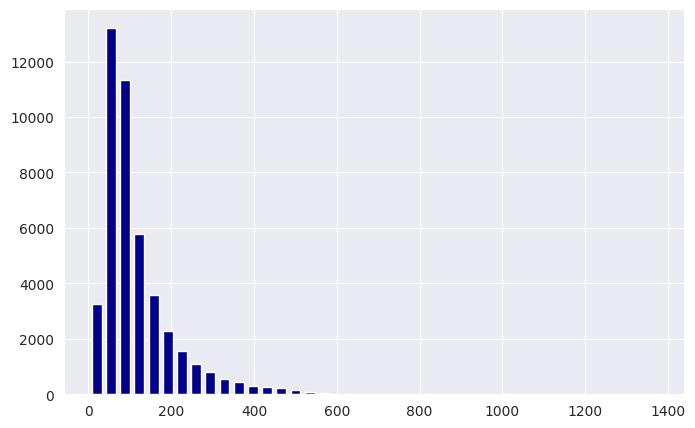

In [41]:
with sns.axes_style("darkgrid"):
    _, hist = plt.subplots(figsize=(8,5))
    hist.hist(seq_tamanho, color='darkblue', bins=40, rwidth=0.7)

Passo agora a definição do limite superior referente ao comprimento das sequencias de review. Para isto como que estes comprimentos estão distribuidos aproximadamente em uma curva normal, irei utilizar a regra estatistica 68–95–99.7, na qual apenas 5% dos valores estarão fora do intervalo "valor médio de seq_tamanho ± 2 desvios padrão de seq_tamanho".

O valor do limite superior é 292 
e o percentual de sequencias em "X_train_tokens" de comprimento maior ou igual ao limite superior é 94.59%.


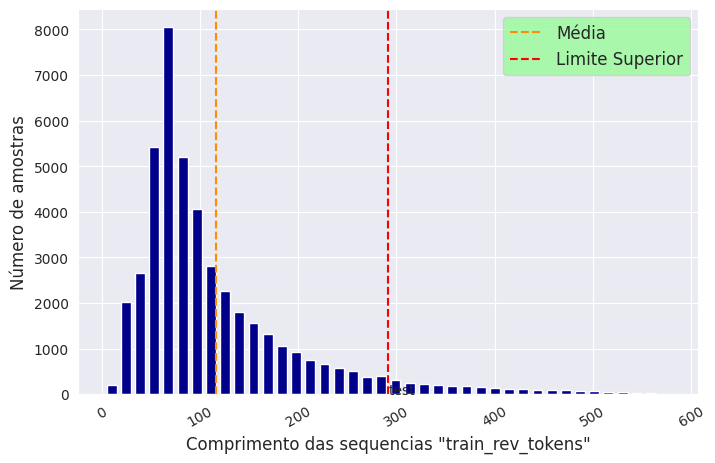

In [42]:
# Armazenando em "upper_bound" nosso limite superior escolhido para o comprimento das sequências
# Calculando a porcentagem de comprimentos menores ou iguais a "upper_bound"
upper_bound = int(np.mean(seq_tamanho) + 2 * np.std(seq_tamanho))
percentage = stats.percentileofscore(seq_tamanho, upper_bound)

print('O valor do limite superior é %d \ne o percentual de sequencias em "X_train_tokens" \
de comprimento maior ou igual ao limite superior é %.2f%%.' % (upper_bound, round(percentage, 2)))

# Histograma dos comprimentos das sequências em "train_rev_tokens"
with sns.axes_style("darkgrid"):
    _, hist = plt.subplots(figsize=(8,5))
    hist.hist(seq_tamanho[seq_tamanho < 2*upper_bound], color='darkblue', bins=40, rwidth=0.7)
    hist.axvline(np.mean(seq_tamanho), color='darkorange', linestyle='--', label='Média')
    hist.axvline(upper_bound, color='r', linestyle='--', label='Limite Superior')

    plt.xlabel('Comprimento das sequencias "train_rev_tokens"', size='large')
    plt.ylabel('Número de amostras', size='large')
    plt.text(upper_bound, 0, 'test')
    plt.legend(fontsize='large', facecolor='palegreen')
    plt.xticks(rotation=30)
    plt.show()

Precisamos agora garantir que todas as sequências da lista tenham o mesmo comprimento. Por padrão, isso pode ser alcançado através do uso do pacote "pad_sequences", preenchendo 0 no início de cada sequência até que cada uma tenha o mesmo comprimento que a sequência definida como mais longa.

In [43]:
from keras.utils import pad_sequences

X_train_pad = pad_sequences(X_train_tokens, maxlen=upper_bound)
X_test_pad = pad_sequences(X_test_tokens, maxlen=upper_bound)

print('\033[1m' + 'X_train_pad.shape:' + '\033[0m', X_train_pad.shape)
print('\033[1m' + 'X_test_pad.shape:' + '\033[0m', X_test_pad.shape, '\n')

# Imprimindo um exemplo de review após preenchimento

idx_pad = random.randint(0, len(X_train_pad)-1)
print('\033[1m' + 'Review #%d after padding:' %idx_pad + '\033[0m' + '\n', X_train_pad[idx_pad])

X_train_pad.shape: (45000, 292)
X_test_pad.shape: (5000, 292) 

Review #43853 after padding:
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0

## B4. Modelo LSTM
Para processamento em cenários como este onde iremos analisar palavras em um texto, isto é, problemas de Processamento de Linguagem Natural, será utilizada a rede neural recorrente LSTM (Long Short Term Memory).

Começamos importando algumas classes do Keras:

- A classe Sequential da API keras.models (para agrupar uma pilha linear de camadas em um modelo)
- A classe Embedding da API keras.layers (para transformar inteiros positivos (índices) em vetores densos de tamanho fixo)
- A classe LSTM da API keras.layers (para aplicar uma camada de LSTM a uma entrada)
- A classe Dropout da API keras.layers (para aplicar dropout a uma entrada)
- A classe Dense da API keras.layers (para aplicar uma camada NN regular densamente conectada a uma entrada)

In [44]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

### **Definição do arquitetura da Rede Neural.**

Criando uma rede LSTM, usando a função de ativação linear retificada ou ReLU. e na camada de saida  a função sigmoide.

No modelo LSTM, definimos os seguintes parâmetros:

- A dimensão de saída da camada de Embedding (dimensão do espaço vetorial contendo a palavra embeddings) é "output_dim"
- O número de unidades da camada LSTM é "units_lstm"
- A taxa de abandono da camada de abandono é "r"
- A função de ativação da camada densa final é sigmóide, pois a saída do modelo deve ser um número entre 0, para avaliações negativas e 1, para avaliações positivas

In [45]:
output_dim = 14
units_lstm = 16
r = 0.8

model = Sequential()
model.add(Embedding(input_dim=dic_size, output_dim=output_dim, input_length=upper_bound))
model.add(LSTM(units_lstm))
model.add(Dropout(r))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 292, 14)           490000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                1984      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 492,001
Trainable params: 492,001
Non-trainable params: 0
_________________________________________________________________


O modelo LSTM para treinamento será compilado com os seguintes parâmetros:

- "adam" - otimizador a ser utilizado durante o processo de treinamento;
- "binary cross-entropy" (bce) - função de custo para este classificador binário;
- "accuracy" - métrica a ser exibida durante o processo de treinamento (com que frequência os rótulos previstos são iguais aos verdadeiros)

In [46]:
model.compile(optimizer='adam', loss='bce', metrics='accuracy')


**Hiperparâmetros**

No contexto de aprendizado profundo os hiperparâmetros do modelo que precisamos configurar manualmente são o tamanho do lote, número de épocas e quantodade de etapas de treinamento, além de estabelecer os dados de validação . Além deste, também temos como hiperparametro "shuffle", usado para embaralhar os dados antes de cada época.



**Dados de validação**

Para treinamento do modelo será utilizado "X_train_pad" como matriz de entrada, "y_train" como matriz de saída.

O modelo será treinado com os dados de treinamento e, simultaneamente, a avaliação do modelo será realizada com os dados de validação após cada época. Não existe um número mágico, mas na literatura pesquisada a sugestão é utilizar 10% a 15% dos dados de treino para validação.

Assim, para meu modelo vou separar 10% dos dados de treino para serem usados como dados de validação.

**Tamanho do lote e iterações**

O tamanho do lote limita o número de amostras a serem apresentadas à rede antes que uma atualização de peso possa ser executada. Refere-se basicamente ao número de exemplos de treinamento utilizados por iteração.

Os valores inteiros populares para batch_size são 16, 64, 128 e 256.

No meu modelo vou usar o valor 384 o que dará cera de 106 iteraçoes em cada época
dados de treino - 40.500 (90% 45000)

**Época**

Uma época é uma passagem de todo o conjunto de dados treinamento/validação pela pelo modelo, sendo o tamanho do lote é o número de amostras que são passadas para a rede de uma só vez.

**Shuffle**

Antes de começar a processar qualquer lote do conjunto de dados, o algoritmo embaralha aleatoriamente os dados de treinamento se definirmos shuffle=True no método fit()


### Treinando o Modelo



---



---



In [33]:
# Storing in "ep_values" the values of the epochs

def print_lossfitted(fitted_l):

  ep_values = range(1, epochs+1)

# Gráfico da perda de treinamento e perda de validação (binary cross-entropy)

  with sns.axes_style("darkgrid"):

    for ifit in fitted_l:

      _, (loss) = plt.subplots(1, 1, figsize=(10, 6))
      loss.plot(ep_values, ifit.history['loss'], color='darkblue', linestyle='dotted',
              marker='o', label='Perda de Treinamento (binary cross-entropy)')
      # loss.plot(ep_values, xfitted_l.history['val_loss'], color='r', linestyle='dotted',
      #         marker='o', label='Perda de Validação (binary cross-entropy)')

    loss.set_xlabel('Epoch', size='large')
    loss.legend(fontsize='large', facecolor='palegreen')

    plt.show()

batch_size: 256
Epoch 1/4
159/159 [==============================] - 37s 232ms/step - loss: 0.0340 - accuracy: 0.9838 - val_loss: 0.9119 - val_accuracy: 0.8789
Epoch 2/4
159/159 [==============================] - 37s 231ms/step - loss: 0.0300 - accuracy: 0.9848 - val_loss: 0.8275 - val_accuracy: 0.8753
Epoch 3/4
159/159 [==============================] - 33s 209ms/step - loss: 0.0281 - accuracy: 0.9853 - val_loss: 1.0145 - val_accuracy: 0.8767
Epoch 4/4
159/159 [==============================] - 34s 216ms/step - loss: 0.0302 - accuracy: 0.9834 - val_loss: 1.0750 - val_accuracy: 0.8713
batch_size: 320
Epoch 1/4
127/127 [==============================] - 29s 229ms/step - loss: 0.0269 - accuracy: 0.9857 - val_loss: 1.0329 - val_accuracy: 0.8738
Epoch 2/4
127/127 [==============================] - 29s 232ms/step - loss: 0.0299 - accuracy: 0.9844 - val_loss: 1.1094 - val_accuracy: 0.8742
Epoch 3/4
127/127 [==============================] - 29s 230ms/step - loss: 0.0345 - accuracy: 0.9829 - 

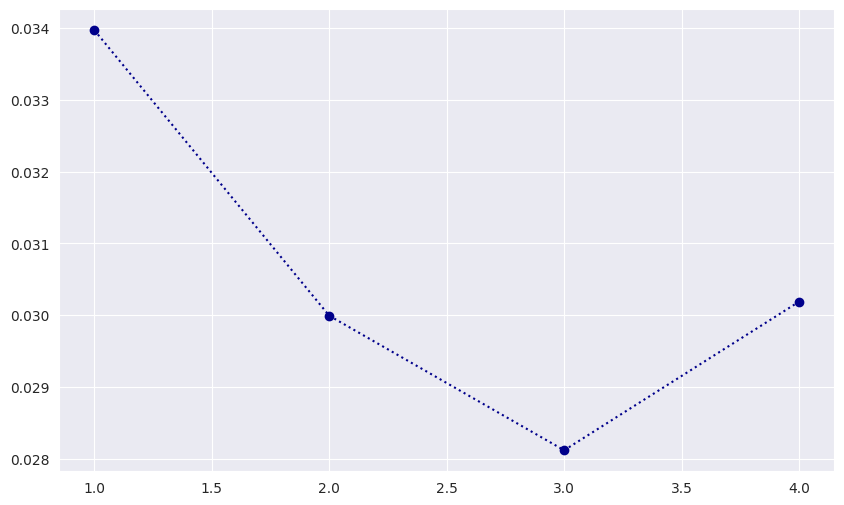

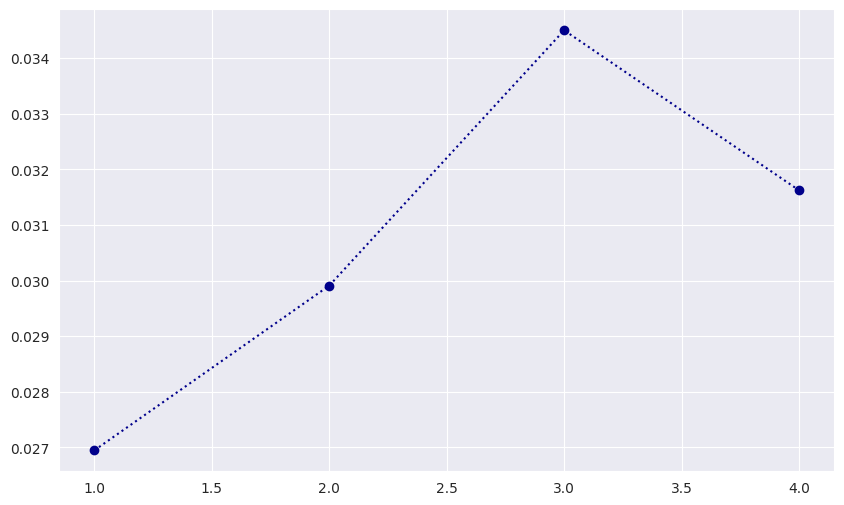

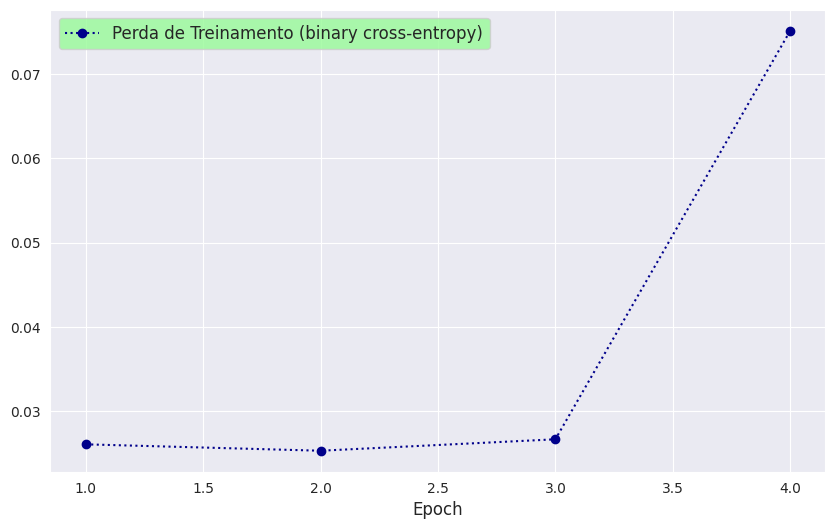

In [35]:
validation_split = 0.1 # percentual de validação
epochs = 4 # númenro de épocas
#batch_size_l = [128, 256, 320, 384, 448, 512] # tamanho do lote
batch_size_l = [256, 320, 384] # tamanho do lote
fitted_l = []

for batch_s in batch_size_l:
  print(f'batch_size: {batch_s}')
  fitted_batch = model.fit(X_train_pad, y_train, validation_split=validation_split,
                           batch_size=batch_s, epochs=epochs, shuffle=True)
  fitted_l.append(fitted_batch)

print_lossfitted(fitted_l)

**Resultado**

Gerando resultado visual para acuracia e perda, tanto de treinamento quanto de validação.

In [32]:
# Storing in "ep_values" the values of the epochs

def print_lossfitted(fitted_l):

  ep_values = range(1, epochs+1)

# Gráfico da perda de treinamento e perda de validação (binary cross-entropy)

  with sns.axes_style("darkgrid"):

    _, (loss) = plt.subplots(1, 1, figsize=(10, 6))
    loss.plot(ep_values, fitted_l.history['loss'], color='darkblue', linestyle='dotted',
              marker='o', label='Perda de Treinamento (binary cross-entropy)')
    loss.plot(ep_values, fitted_l.history['val_loss'], color='r', linestyle='dotted',
              marker='o', label='Perda de Validação (binary cross-entropy)')
    loss.set_xlabel('Epoch', size='large')
    loss.legend(fontsize='large', facecolor='palegreen')

    plt.show()

O resultado mostra que a perda com dados de validação tendo melhor resultado com 2 épocas mas a acurácia com dados de validação tem melhor resultado com 3 épocas.

Assim vou utilizar 3 épocas como melhor resultado para o modelo.




---



---



In [47]:
# retreinando com 3 epocas e batch size de 384
validation_split = 0.1 # percentual de validação
batch_size = 384 # tamanho do lote
epochs = 3 # númenro de épocas

fitted = model.fit(X_train_pad, y_train, validation_split=validation_split,
                   batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/3
106/106 [==============================] - 29s 249ms/step - loss: 0.6271 - accuracy: 0.6723 - val_loss: 0.4572 - val_accuracy: 0.8496
Epoch 2/3
106/106 [==============================] - 26s 247ms/step - loss: 0.3903 - accuracy: 0.8597 - val_loss: 0.3014 - val_accuracy: 0.8840
Epoch 3/3
106/106 [==============================] - 27s 253ms/step - loss: 0.2832 - accuracy: 0.9089 - val_loss: 0.2620 - val_accuracy: 0.8976


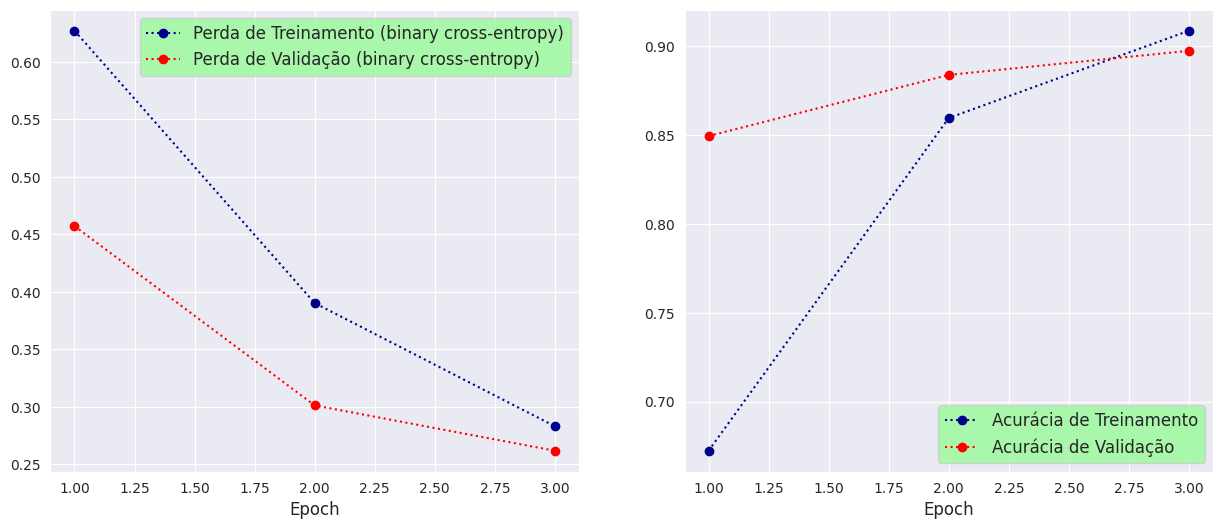

In [48]:
# Storing in "ep_values" the values of the epochs

ep_values = range(1, epochs+1)

# Plot of the training loss and validation loss (binary cross-entropy)

with sns.axes_style("darkgrid"):

    _, (loss, acc) = plt.subplots(1, 2, figsize=(15, 6))
    loss.plot(ep_values, fitted.history['loss'], color='darkblue', linestyle='dotted',
              marker='o', label='Perda de Treinamento (binary cross-entropy)')
    loss.plot(ep_values, fitted.history['val_loss'], color='r', linestyle='dotted',
              marker='o', label='Perda de Validação (binary cross-entropy)')
    loss.set_xlabel('Epoch', size='large')
    loss.legend(fontsize='large', facecolor='palegreen')

    acc.plot(ep_values, fitted.history['accuracy'], color='darkblue', linestyle='dotted',
             marker='o', label='Acurácia de Treinamento')
    acc.plot(ep_values, fitted.history['val_accuracy'], color='r', linestyle='dotted',
             marker='o', label='Acurácia de Validação')
    acc.set_xlabel('Epoch', size='large')
    acc.legend(fontsize='large', facecolor='palegreen')

    plt.show()

## B5. Resultados

Para entender o desempenho do odelo, serao avaliados 2 indicadores: Acurácia e Perda
- Acuracia é a contagem de previsões em que o valor previsto é igual ao valor verdadeiro.
- Perda (Loss) é uma soma dos erros cometidos para cada amostra em conjuntos de treinamento ou validação.

### Acurácia e Perda
Vou agora cacular a acurácia e a perda no conjunto de dados de teste.

In [49]:
result= model.evaluate(X_test_pad, y_test)

157/157 [==============================] - 6s 35ms/step - loss: 0.2692 - accuracy: 0.8954


- Accuracia do modelo ficou em cerca de 89%
- Perda ficou em 28%

### Matriz Confusão
Em seguida vamos calcular e plotar a matriz de confusão para as previsões do modelo treinado.

In [50]:
from sklearn.metrics import confusion_matrix

predictions = np.round(model.predict(X_test_pad))
cf_matrix = confusion_matrix(y_test, predictions)

157/157 [==============================] - 6s 34ms/step


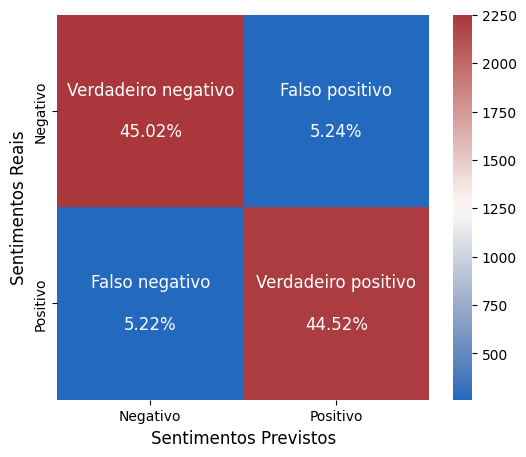

In [51]:
legendas = ['Verdadeiro negativo', 'Falso positivo', 'Falso negativo', 'Verdadeiro positivo']
percentagens = [round(100*num, 2) for num in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n\n{v2}%' for v1, v2 in zip(legendas, percentagens)]
labels = np.asarray(labels).reshape(2, 2)

# Heatmap plot of the confusion matrix

plt.figure(figsize = (6,5 ))

cm = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='vlag', annot_kws={'fontsize': 'large'})
cm.set_xlabel('Sentimentos Previstos', size='large')
cm.set_ylabel('Sentimentos Reais', size='large')
cm.xaxis.set_ticklabels(['Negativo', 'Positivo'])
cm.yaxis.set_ticklabels(['Negativo', 'Positivo'])

plt.show()

Por fim, para corroborar a acuracia do modelo, iremos testar o modelo treinado com uma "review" escolhida aleatoriamente do conjunto de teste.

Para isto iremos exibir a avaliação original, o sentimento previsto pelo modelo com sua probabilidade e o sentimento real.

### Checagem final

In [52]:
dsdeep_sav.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [54]:
# Escolhendo aleatoriamente uma amostra dos dados de teste
idx_test = random.randint(0, len(y_test)-1)
idx_original = X_test.index[idx_test]
(review_real, sentiment_real) = dsdeep_sav.iloc[idx_original]

prediction = model.predict(X_test_pad)[idx_test][0]
prediction_sent = 'positive' if prediction >= 0.5 else 'negative'
probability = round(prediction if prediction >= 0.5 else 1-prediction, 2)

# Apresentando a avaliação original, seu sentimento e probabilidade previstos e o sentimento original

print('\033[1m' + 'Review #%d:' % idx_original + '\033[0m' + '\n', review_real, '\n')
print('\033[1m' + 'Sentiment Previsto:' + '\033[0m', prediction_sent, '(com probabilidade %.2f)' % probability, '\n')
print('\033[1m' + 'Sentimento Real:' + '\033[0m', sentiment_real)

157/157 [==============================] - 4s 24ms/step
Review #5642:
 I kind of like Bam Margera, so I was curious. <br /><br />But watching a home production with somebody elses friends and family, with a decent camera and a sound guy, just isn't good film-making. <br /><br />Writing, direction, acting and editing is abysmal at best. But I sat through half of it. And why?<br /><br />This film gives perfect examples of what not to do, it is a film student's dream of what to avoid at every stage of the process. Cram it into film school curiculums all over the joint!<br /><br />So thanx Bam! Now I know Jackass is for real - cause you ain't looking to win an Oscar, dude:) 

Sentiment Previsto: negative (com probabilidade 0.72) 

Sentimento Real: negative
